In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

You should consider upgrading via the 'C:\Users\82104\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv("건강데이터_2022_2023_합본.csv")

In [5]:
df['LS_VEG1'].value_counts()

LS_VEG1
2.0     5685
1.0     5482
3.0     1234
5.0      121
4.0       80
6.0       13
7.0        4
9.0        4
99.0       4
8.0        2
Name: count, dtype: int64

In [42]:
df['BE5_1'].value_counts()

BE5_1
1.0    7830
8.0    1234
6.0    1045
9.0     951
4.0     708
3.0     662
2.0     450
5.0     305
Name: count, dtype: int64

In [53]:
df['BE3_31'].value_counts()

BE3_31
8.0     3203
88.0    1959
1.0     1592
6.0     1317
4.0     1216
99.0     965
3.0      955
5.0      849
7.0      565
2.0      564
Name: count, dtype: int64

In [46]:
df['BD1_11'].value_counts()

BD1_11
8.0    3090
4.0    2294
2.0    2199
1.0    2086
5.0    1503
3.0    1172
6.0     644
9.0     197
Name: count, dtype: int64

In [47]:
df['BS3_2'].value_counts()

BS3_2
888.0    11271
20.0       411
10.0       410
999.0      210
15.0       205
5.0        125
3.0         62
7.0         61
2.0         57
1.0         50
30.0        46
12.0        45
8.0         45
4.0         42
6.0         32
13.0        22
40.0        17
25.0        15
14.0        11
9.0         10
17.0         9
18.0         9
16.0         8
11.0         3
50.0         3
45.0         2
35.0         1
19.0         1
60.0         1
26.0         1
Name: count, dtype: int64

전처리 

In [6]:
df['BE5_1'] = df['BE5_1'].astype(str).str.strip().replace({ #1주일간 근력운동 일수
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'8.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
 })
df['BE5_1'] = pd.to_numeric(df['BE5_1'], errors='coerce')

In [7]:
df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({  #최근 1년 동안 평균 채소류(김치 및 장아찌 제외), 버섯류, 해조류 섭취 빈도
'1.0' : 1095,
'2.0' : 730,
'3.0' : 365,
'4.0' : 286,
'5.0' : 156,
'6.0' : 52,
'7.0' : 30,
'8.0' : 12,
'9.0' : 6,
'99.0': np.nan,
'nan' : np.nan
})
df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')

In [8]:

# 일반 담배 하루 평균 흡연량 처리
df['BS3_2'] = df['BS3_2'].replace(888, 0)

# 전자 담배 하루 평균 흡연량 처리
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan}) 

# 합치기 전 숫자형으로 변환
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')

# 두 변수 합산 (NaN은 무시하고 합함)
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)

df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({  #최근 1년 동안 평균 채소류(김치 및 장아찌 제외), 버섯류, 해조류 섭취 빈도
'999.0': np.nan,
})

df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')


In [9]:
set(df['tobacco'])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 nan,
 15.0,
 16.0,
 17.0,
 nan,
 nan,
 20.0,
 21.0,
 nan,
 22.0,
 nan,
 25.0,
 nan,
 nan,
 nan,
 nan,
 14.0,
 30.0,
 nan,
 27.0,
 33.0,
 nan,
 34.0,
 35.0,
 nan,
 36.0,
 40.0,
 nan,
 nan,
 45.0,
 nan,
 nan,
 50.0,
 nan,
 nan,
 nan,
 55.0,
 nan,
 60.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 18.0,
 nan,
 nan,
 19.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 23.0,
 nan,
 nan,
 24.0,
 nan,
 nan,
 nan,
 26.0,
 28.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [10]:
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({ #1년간 음주빈도
'1.0' : 0,
'2.0' : 6,
'3.0' : 12,
'4.0' : 42,
'5.0' : 130,
'6.0' : 286,
'8.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

고혈압 

In [11]:
# HE_HP 결측치 행 제거
df_clustering = df.dropna(subset=['HE_HP'])

columns_to_drop = ['occp', 'HE_Ualb', 'HE_HTG', 'HE_HCHOL', 'HE_fh', 'HE_DMfh1', 'HE_DMfh2',
                   'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2']
df_clustering = df_clustering.drop(columns=columns_to_drop, errors='ignore')

low_missing_columns = [
    'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

In [12]:
# 이전에 low_missing_columns, df_clustering가 정의되었다고 가정합니다.

low_missing_columns = [
 'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

print("--- Checking and filling NaNs ---")
print("Initial NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())
print("-" * 30)

# NaN을 각 컬럼의 최빈값으로 df_clustering에서 대체
for col in low_missing_columns:
    print(f"\nProcessing column: '{col}'")
    if col not in df_clustering.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")
        continue # 다음 컬럼으로 넘어감

    initial_nan_count = df_clustering[col].isnull().sum()
    print(f"  NaN count before filling: {initial_nan_count}")

    mode_value = df_clustering[col].mode(dropna=True)

    if not mode_value.empty:
        fill_value = mode_value[0]
        print(f"  Calculated mode value: {fill_value} (Type: {type(fill_value)})")

        # 실제로 NaN이 있는 경우에만 fillna 시도
        if initial_nan_count > 0:
             df_clustering[col].fillna(fill_value, inplace=True)
             print(f"  Filled {initial_nan_count} NaN values with {fill_value}.")
        else:
             print(f"  No NaN values found to fill in '{col}'.")

        final_nan_count = df_clustering[col].isnull().sum()
        print(f"  NaN count after filling: {final_nan_count}")

        # 만약 final_nan_count가 0이 아니라면, 채워지지 않은 NaN이 있다는 뜻
        if final_nan_count > 0:
            print(f"  Note: {final_nan_count} NaN values remain in '{col}'. They might not be standard np.nan.")

    else:
        print(f"  Could not determine mode for '{col}' (column might be all NaNs or empty after dropna). No filling performed.")
        print(f"  NaN count after check: {df_clustering[col].isnull().sum()}")


print("\n--- Filling process finished ---")
print("Final NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())

# 추가 확인: NaN이 아닌 다른 형태의 누락된 값 확인 (예: 빈 문자열 '')
print("\n--- Checking for other potential missing value representations ---")
for col in low_missing_columns:
     if df_clustering[col].dtype == 'object': # 문자열 타입 컬럼인 경우
         print(f"Checking column '{col}' (object dtype):")
         # 빈 문자열 또는 'NA' 등 의심스러운 값의 개수를 세어봅니다.
         print(f"  Count of empty strings (''): {df_clustering[col].eq('').sum()}")
         # 다른 일반적이지 않은 값들을 value_counts로 확인
         print("  Top values (including non-standard):")
         print(df_clustering[col].value_counts(dropna=False).head()) # dropna=False 포함

--- Checking and filling NaNs ---
Initial NaN count for specified columns:
BE5_1      847
BD1_11     160
LS_VEG1    421
tobacco    173
dtype: int64
------------------------------

Processing column: 'BE5_1'
  NaN count before filling: 847
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 847 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'BD1_11'
  NaN count before filling: 160
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 160 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'LS_VEG1'
  NaN count before filling: 421
  Calculated mode value: 730.0 (Type: <class 'numpy.float64'>)
  Filled 421 NaN values with 730.0.
  NaN count after filling: 0

Processing column: 'tobacco'
  NaN count before filling: 173
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 173 NaN values with 0.0.
  NaN count after filling: 0

--- Filling process finished ---
Final NaN count for specified columns:
BE5

In [13]:
knn_columns = [
    'HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu',
    'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]

from sklearn.impute import KNNImputer

# HE_HP별로 데이터 분리 및 KNN Imputation
for hp_value in [1, 2, 3, 4]:
    # HE_HP 값에 해당하는 데이터 추출
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][knn_columns].copy()
    if not hp_df.empty:
        # 비해당/모름 값 NaN으로 변환
        hp_df = hp_df.replace([888, 999], np.nan)
        # KNN Imputation
        imputer = KNNImputer(n_neighbors=5, weights="uniform")
        hp_imputed = imputer.fit_transform(hp_df)
        hp_imputed_df = pd.DataFrame(hp_imputed, columns=knn_columns, index=hp_df.index)
        # 원본 데이터에 반영
        df_clustering.loc[hp_df.index, knn_columns] = hp_imputed_df


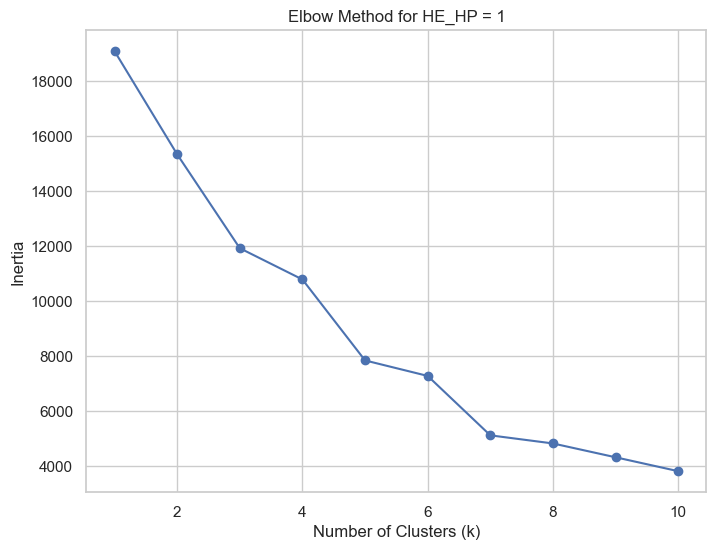

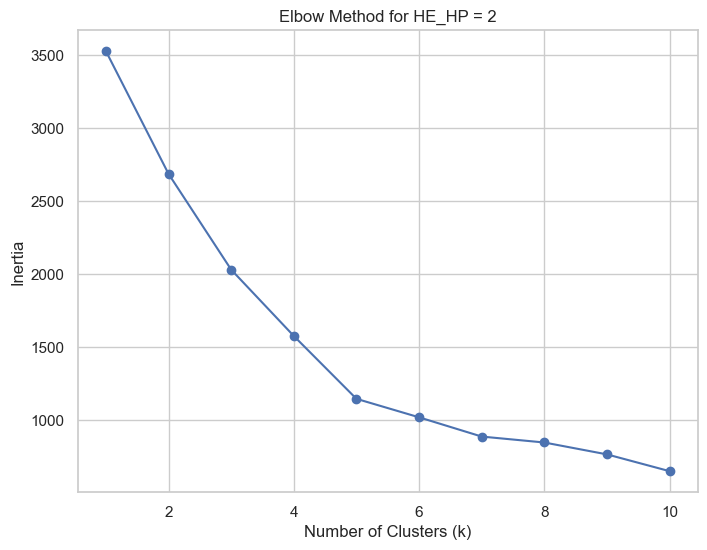

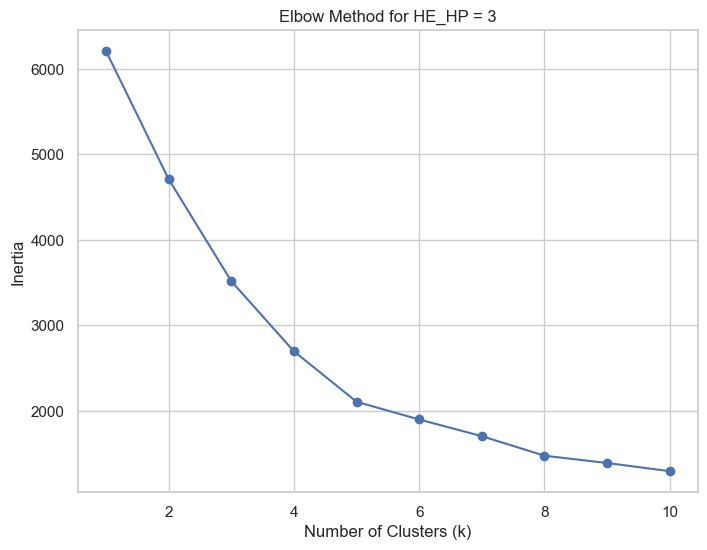

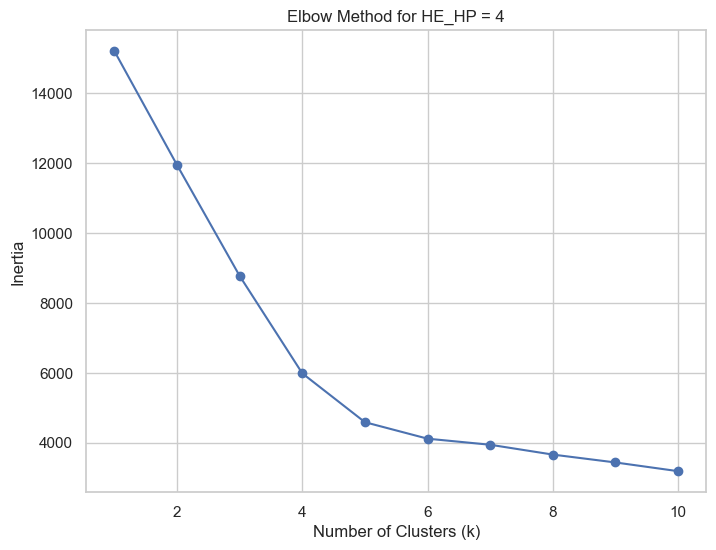

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 피처 표준화
scaler = StandardScaler()

# 클러스터 수 범위 설정 (예: 1~10)
k_range = range(1, 11)

# 결과를 저장할 데이터프레임 준비
df_clustering['Cluster'] = np.nan

#selected_cols = knn_columns + ["BD1_11","tobacco","BE5_1","LS_VEG1"]
selected_cols = ["BD1_11","tobacco","BE5_1","LS_VEG1"]
#selected_cols = ['HE_sbp1', 'HE_dbp1', 'HE_wc','HE_BMI','HE_glu', "BD1_11","tobacco","BE5_1","LS_VEG1"]

for hp_value in [1, 2, 3, 4]:
    # HE_HP 값에 해당하는 데이터 추출
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][selected_cols].copy()

    if not hp_df.empty:
        # 데이터 표준화
        scaled_df = scaler.fit_transform(hp_df)

        # 엘보우 방법: 각 k에 대해 관성(Inertia) 계산
        inertias = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_df)
            inertias.append(kmeans.inertia_)

        # 엘보우 플롯 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertias, marker='o')
        plt.title(f'Elbow Method for HE_HP = {hp_value}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        # 최적 k 선택 (예: 관성 감소율 기반)
        # 여기서는 수동으로 플롯을 보고 k를 선택하거나, 자동화된 방법을 사용할 수 있음
        # 예: 관성 감소율이 완만해지는 k를 선택 (임시로 k=3으로 설정, 실제로는 플롯 확인 후 결정)
        optimal_k = 3  # TODO: 엘보우 플롯을 보고 직접 선택하거나 자동화 필요

        # 최적 k로 K-means 군집화 수행
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(scaled_df)

        # 클러스터 결과 저장
        df_clustering.loc[hp_df.index, 'Cluster'] = clusters


--- Processing HE_HP = 1 ---
  Calculated optimal k (using second difference heuristic): 4


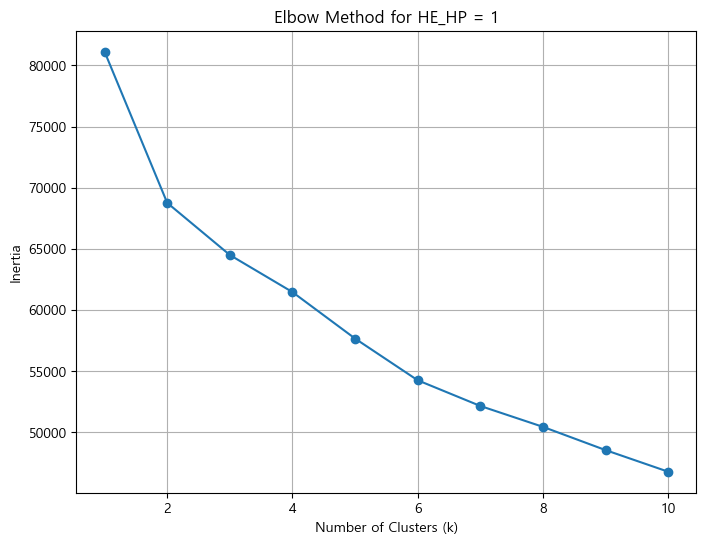


--- Processing HE_HP = 2 ---
  Calculated optimal k (using second difference heuristic): 8


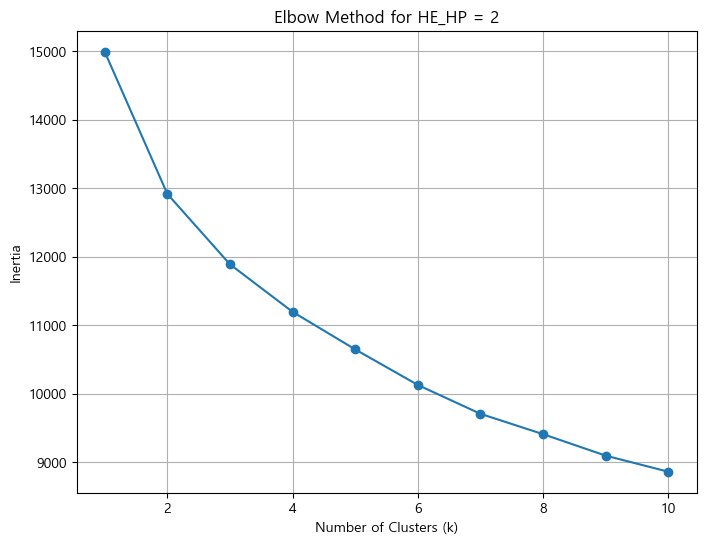


--- Processing HE_HP = 3 ---
  Calculated optimal k (using second difference heuristic): 4


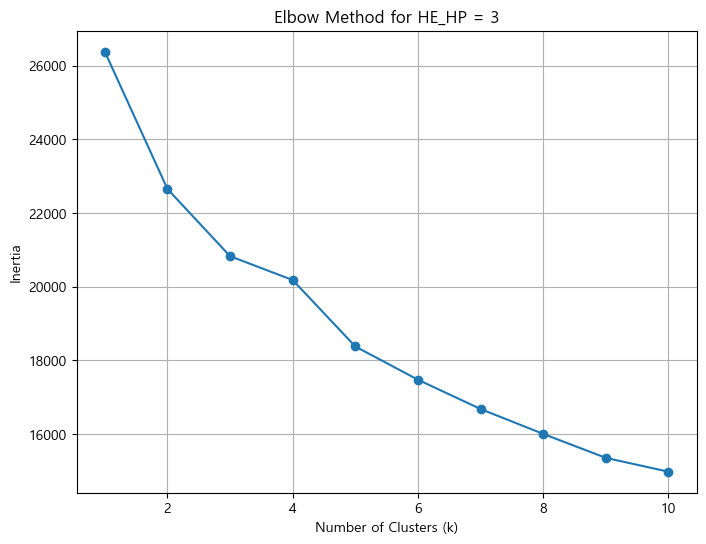


--- Processing HE_HP = 4 ---
  Calculated optimal k (using second difference heuristic): 8


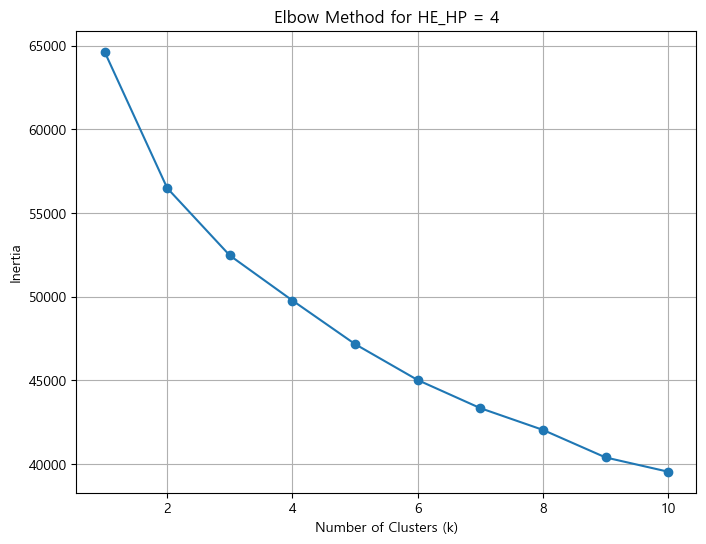

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 피처 표준화
scaler = StandardScaler()

# 클러스터 수 범위 설정 (예: 1~10)
k_range = range(1, 11)

# 결과를 저장할 데이터프레임 준비
df_clustering['Cluster'] = np.nan

selected_cols = knn_columns + ["BD1_11","tobacco","BE5_1","LS_VEG1"]

for hp_value in [1, 2, 3, 4]:
    print(f"\n--- Processing HE_HP = {hp_value} ---")
    # HE_HP 값에 해당하는 데이터 추출
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][selected_cols].copy()

    if not hp_df.empty:
        # 데이터 표준화
        # 주의: 각 그룹별로 별도의 scaler를 fit/transform 하거나, 전체 데이터로 미리 fit한 scaler를 사용해야 합니다.
        # 여기서는 그룹별로 fit/transform하고 있으므로, 그룹 내에서의 상대적 스케일이 중요합니다.
        # 만약 전체 데이터 분포를 기준으로 하려면, 루프 전에 scaler.fit(df_clustering[selected_cols]) 필요
        scaled_df = scaler.fit_transform(hp_df)

        # 엘보우 방법: 각 k에 대해 관성(Inertia) 계산
        inertias = []
        # 클러스터 개수가 데이터 포인트 개수보다 많을 수는 없으므로 범위를 조정
        # 또한, 실루엣 계수 등 다른 검증 지표를 사용하려면 k>1 이어야 합니다.
        max_k_for_elbow = min(len(scaled_df), 10) # 데이터 개수와 설정 범위 중 작은 값
        if max_k_for_elbow < 2:
             print(f"  Not enough data points ({len(scaled_df)}) for HE_HP = {hp_value} to perform clustering for k > 1.")
             # k=1로 설정하거나 처리를 건너뛸 수 있습니다. 여기서는 건너뛰고 메시지 출력
             continue # 다음 HE_HP 값으로 넘어감


        # 실제 관성을 계산할 k 범위 (최소 1부터 시작)
        k_range_actual = range(1, max_k_for_elbow + 1)

        for k in k_range_actual:
            # n_init='auto' 또는 숫자로 지정 (최신 sklearn 버전 권장)
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10 if k>1 else 1) # k=1일때 n_init=1 가능
            kmeans.fit(scaled_df)
            inertias.append(kmeans.inertia_)

        # ====== 최적 k 계산 (엘보우 방법 휴리스틱) ======
        calculated_optimal_k = 1 # 데이터가 충분치 않으면 기본값 1

        if len(k_range_actual) >= 3: # 엘보우를 찾으려면 최소 k=1, 2, 3 (3개 이상의 점) 필요
            # 관성 감소량 계산
            # inertias[0]은 k=1, inertias[1]은 k=2 ...
            # drops[i] = inertias[i] - inertias[i+1] => k=(i+1)에서 k=(i+2)로 갈 때 감소량
            drops = np.diff(inertias) * -1 # 감소량이므로 -1 곱해서 양수로 만듦

            # 감소량의 변화량 계산 (두 번째 차분)
            # change_in_drops[i] = drops[i] - drops[i+1]
            # 이 값이 가장 큰 (가장 긍정적인) 지점이 감소율이 가장 크게 꺾이는 곳입니다.
            # change_in_drops[i]는 k = i + 2 일 때의 변화를 나타냅니다.
            if len(drops) >= 2:
                change_in_drops = np.diff(drops)

                # 변화량이 가장 큰 (가장 긍정적인) 인덱스 찾기
                # np.argmax는 최대값의 인덱스를 반환
                # 이 인덱스에 2를 더해야 실제 k 값이 됩니다 (change_in_drops[i]는 k=i+2)
                # 예를 들어, change_in_drops[0]이 최대면 k=2가 엘보우
                elbow_index = np.argmax(change_in_drops)

                # 계산된 최적 k
                calculated_optimal_k = k_range_actual[elbow_index + 1] # k=1에서의 drop은 drops[0], k=2에서의 변화는 change_in_drops[0]

                # Note: 이 방법은 하나의 휴리스틱이며, 복잡한 곡선에서는 예상과 다를 수 있습니다.
                # 시각적인 확인이 여전히 중요합니다.

                print(f"  Calculated optimal k (using second difference heuristic): {calculated_optimal_k}")
            else:
                 print("  Not enough data points or k range to calculate second difference for elbow heuristic.")

        else:
             print("  Not enough data points or k range (min 3 points) to apply elbow heuristic.")
             
        # 엘보우 플롯 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertias, marker='o')
        plt.title(f'Elbow Method for HE_HP = {hp_value}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        # 최적 k 선택 (예: 관성 감소율 기반)
        # 여기서는 수동으로 플롯을 보고 k를 선택하거나, 자동화된 방법을 사용할 수 있음
        # 예: 관성 감소율이 완만해지는 k를 선택 (임시로 k=3으로 설정, 실제로는 플롯 확인 후 결정)
        optimal_k = 3  # TODO: 엘보우 플롯을 보고 직접 선택하거나 자동화 필요

        # 최적 k로 K-means 군집화 수행
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(scaled_df)

        # 클러스터 결과 저장
        df_clustering.loc[hp_df.index, 'Cluster'] = clusters


--- Processing HE_HP = 1 with k = 3 ---
Silhouette Score for HE_HP = 1 (k=3): 0.4184
Cluster Characteristics (Mean values for HE_HP = 1, k=3):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             25.585036   0.481151     0.216978          788.681151
1            127.955823  14.753012     0.508032          736.439759
2             31.544431   1.017522     4.046308          810.551940
------------------------------------------------------------


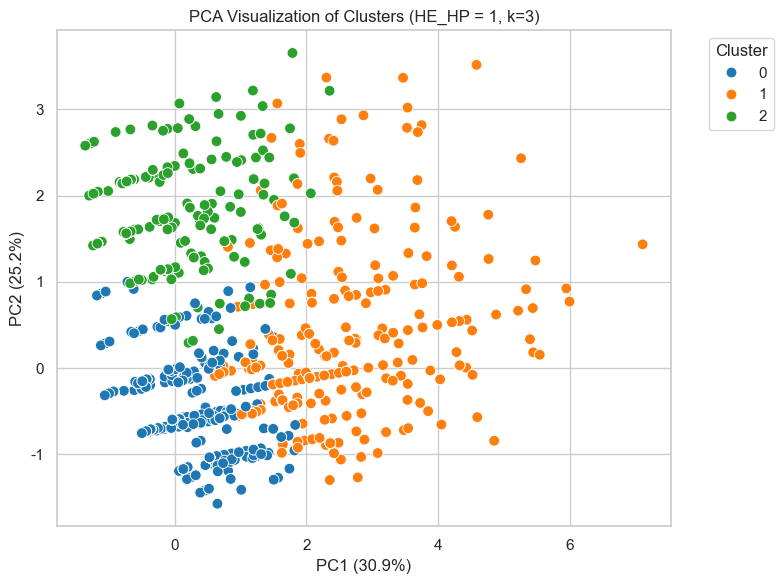


--- Processing HE_HP = 2 with k = 5 ---
Silhouette Score for HE_HP = 2 (k=5): 0.5045
Cluster Characteristics (Mean values for HE_HP = 2, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             14.780000   0.173333     0.176667         1095.000000
1             58.188235  17.364706     0.670588          771.529412
2             32.847222   1.437500     4.208333          908.513889
3            286.000000   4.238095     0.785714          820.619048
4             26.418006   0.344051     0.183280          652.691318
------------------------------------------------------------


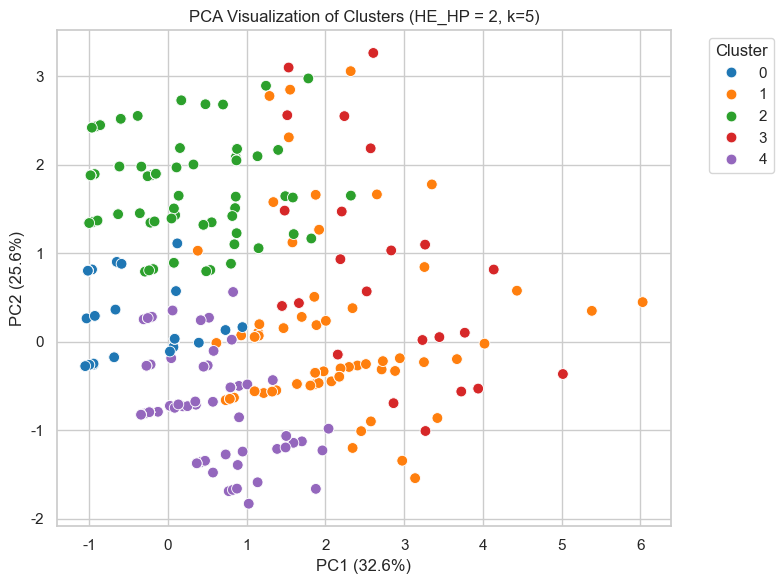


--- Processing HE_HP = 3 with k = 5 ---
Silhouette Score for HE_HP = 3 (k=5): 0.4537
Cluster Characteristics (Mean values for HE_HP = 3, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             37.496552   0.394828     0.237931          655.956897
1             39.338983   1.279661     4.224576          893.271186
2            286.000000   6.829060     0.709402          803.085470
3             30.214953   0.448598     0.168224         1095.000000
4             75.109948  17.774869     0.314136          771.764398
------------------------------------------------------------


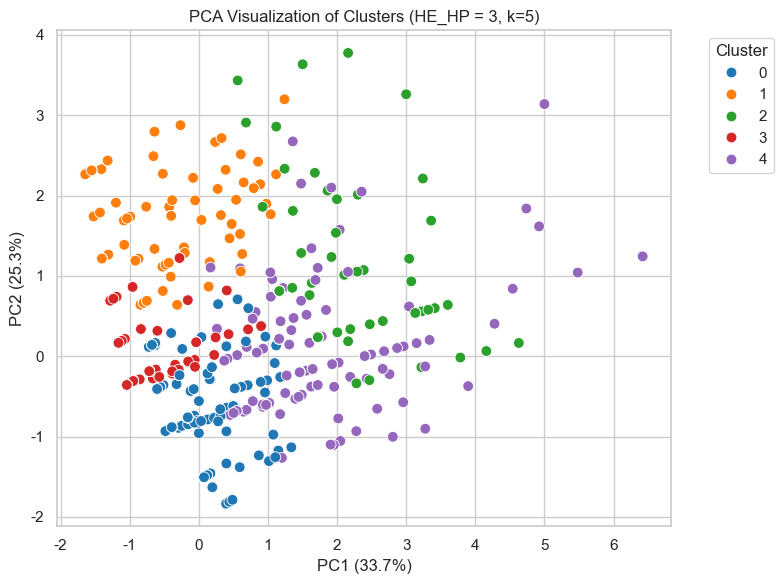


--- Processing HE_HP = 4 with k = 5 ---
Silhouette Score for HE_HP = 4 (k=5): 0.5687
Cluster Characteristics (Mean values for HE_HP = 4, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             19.889896   0.320596     0.079016         1095.000000
1             33.828125   0.748047     4.410156          950.996094
2             24.836302   0.631891     0.139101          671.674300
3            131.664671  19.419162     0.532934          840.835329
4            286.000000   1.901709     1.012821          914.282051
------------------------------------------------------------


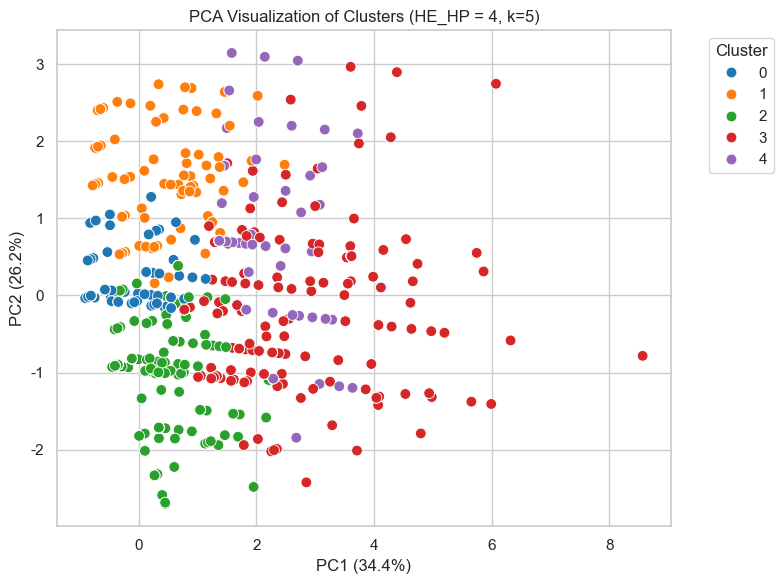

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd # pandas 필요
import matplotlib.pyplot as plt # matplotlib 필요
from sklearn.cluster import KMeans # KMeans 필요
# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
from sklearn.metrics import silhouette_score


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량',
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도'
}

# 시각화용 설정
sns.set(style="whitegrid")

# HE_HP 별로 반복
for hp_value, optimal_k in zip([1, 2, 3, 4], [3, 5, 5, 5]):
    print(f"\n--- Processing HE_HP = {hp_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함 (예: selected_cols = ['HE_sbp1', '...', 'LS_VEG1'])
    # df_clustering는 이전에 로드/처리되어 있어야 함
    # scaler는 이전에 fit 되어 있어야 함
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][selected_cols].copy()
    # 이 변수는 현재 코드 플로우에서 직접 사용되지 않습니다. (기존 클러스터 라벨)
    # cluster_labels = df_clustering[df_clustering['HE_HP'] == hp_value]['Cluster']


    if not hp_df.empty:
        # 표준화
        scaled_df = scaler.fit_transform(hp_df)

        # ====== 여기에서 optimal_k 값을 사용하여 클러스터링 수행 ======
        # K-Means 예시
        # n_init='auto' 또는 숫자로 지정 (최신 sklearn 버전 권장)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        if optimal_k > 1 and scaled_df.shape[0] > 1: # 데이터 포인트가 1개보다 많아야 계산 가능
                silhouette_avg = silhouette_score(scaled_df, new_cluster_labels)
                print(f"Silhouette Score for HE_HP = {hp_value} (k={optimal_k}): {silhouette_avg:.4f}")
        else:
            if optimal_k <= 1:
                print(f"Silhouette Score cannot be calculated for k = {optimal_k} (must be > 1).")
            else: # scaled_df.shape[0] <= 1
                 print(f"Silhouette Score cannot be calculated for HE_HP = {hp_value}: Insufficient data points ({scaled_df.shape[0]}).")

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 새로 생성된 클러스터 라벨 추가
        # 인덱스가 맞아야 함 (위에서 같은 필터링 기준으로 슬라이싱했으므로 일치한다고 가정)
        hp_df_with_labels = hp_df.copy() # 원본 hp_df 변경 방지를 위해 복사
        hp_df_with_labels['New_Cluster'] = new_cluster_labels

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = hp_df_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_HP = {hp_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 new_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = new_cluster_labels

        # PCA 2차원 축소
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df)

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 새로 생성된 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        plt.title(f'PCA Visualization of Clusters (HE_HP = {hp_value}, k={optimal_k})') # 제목에 k값 추가
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

k-평균, 계층적 군집화, minibatch 방법 비교 


--- Processing HE_HP = 1 with k = 3 ---
Comparing algorithms for k = 3:
  - KMeans: Silhouette Score = 0.3392
  - Agglomerative: Silhouette Score = 0.2873
  - MiniBatchKMeans: Silhouette Score = 0.4095

Best algorithm for HE_HP = 1 (k=3): MiniBatchKMeans (Silhouette Score: 0.4095)
Cluster Characteristics (Mean values for HE_HP = 1, k=3):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             25.880834   0.517758     0.177869          781.388905
1            129.696721  14.846311     0.502049          737.319672
2             30.063854   0.938426     3.864310          835.850627
------------------------------------------------------------


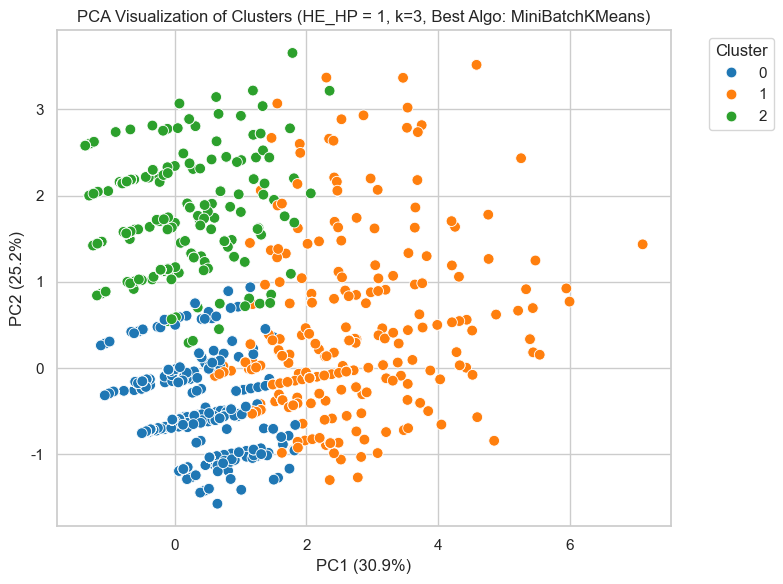


--- Processing HE_HP = 2 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.5114
  - Agglomerative: Silhouette Score = 0.4846
  - MiniBatchKMeans: Silhouette Score = 0.5046

Best algorithm for HE_HP = 2 (k=5): KMeans (Silhouette Score: 0.5114)
Cluster Characteristics (Mean values for HE_HP = 2, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             15.765957   0.351064     0.187943          644.741135
1            201.724138   2.091954     0.505747          849.264368
2             32.167832   1.398601     4.223776          907.209790
3             61.858824  17.658824     0.670588          762.941176
4              8.715789   0.133333     0.168421         1095.000000
------------------------------------------------------------


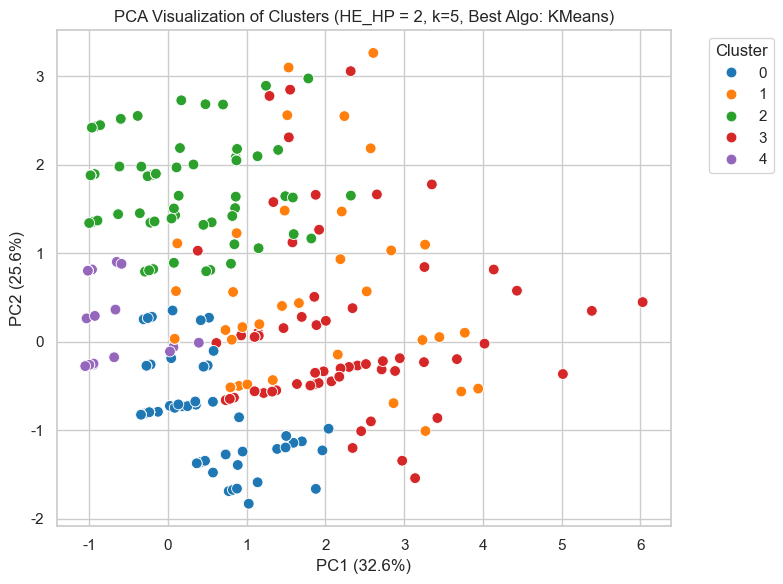


--- Processing HE_HP = 3 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.4493
  - Agglomerative: Silhouette Score = 0.3979
  - MiniBatchKMeans: Silhouette Score = 0.4516

Best algorithm for HE_HP = 3 (k=5): MiniBatchKMeans (Silhouette Score: 0.4516)
Cluster Characteristics (Mean values for HE_HP = 3, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             37.431856   0.853859     0.231527          657.085386
1             30.242424   0.475524     0.172494         1095.000000
2            286.000000   6.672414     0.715517          806.862069
3             39.338983   1.279661     4.224576          893.271186
4             83.592593  19.240741     0.339506          783.746914
------------------------------------------------------------


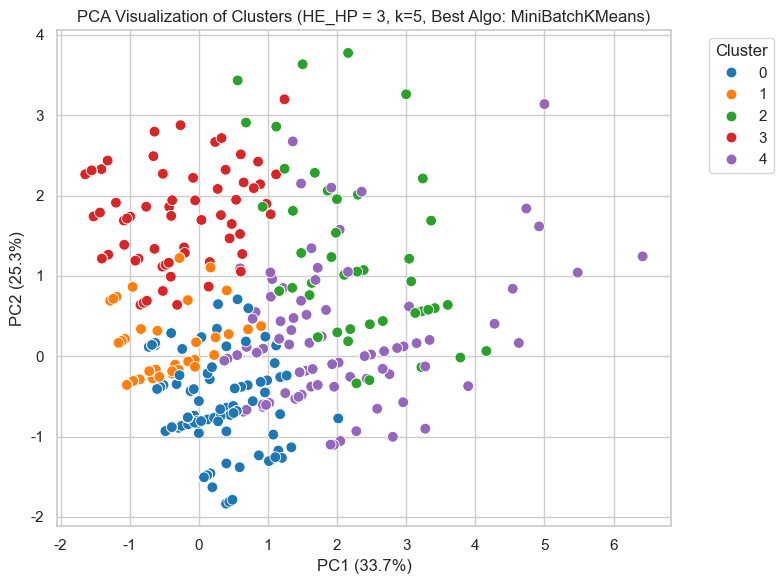


--- Processing HE_HP = 4 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.5618
  - Agglomerative: Silhouette Score = 0.5344
  - MiniBatchKMeans: Silhouette Score = 0.5685

Best algorithm for HE_HP = 4 (k=5): MiniBatchKMeans (Silhouette Score: 0.5685)
Cluster Characteristics (Mean values for HE_HP = 4, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             33.828125   0.748047     4.410156          950.996094
1             24.836302   0.631891     0.139101          671.674300
2             19.889896   0.320596     0.079016         1095.000000
3            129.793939  19.475758     0.530303          839.966667
4            286.000000   2.117647     1.008403          914.252101
------------------------------------------------------------


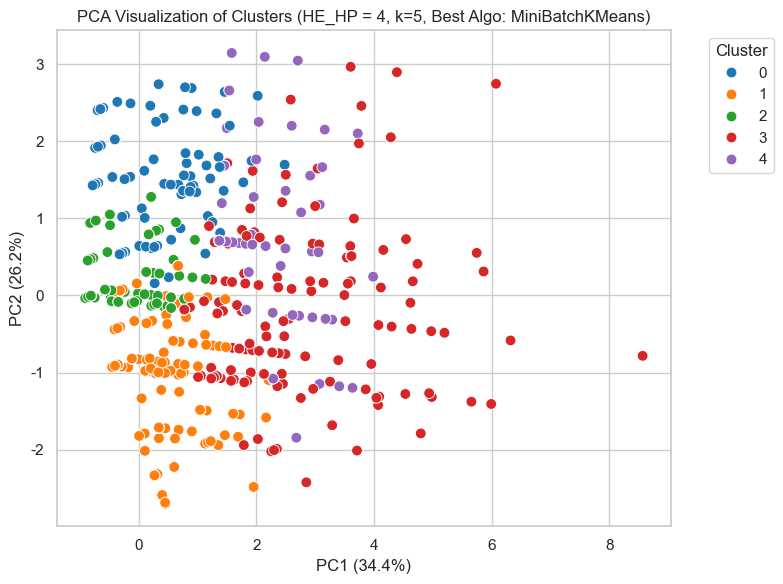


--- Processing complete ---


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # For silhouette plot colors
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MiniBatchKMeans # AgglomerativeClustering, DBSCAN, MiniBatchKMeans 임포트 추가
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# RandomForestClassifier는 이 특정 스니펫에서 직접 사용되지 않으므로 주석 처리하거나 필요에 따라 유지
# from sklearn.ensemble import RandomForestClassifier

# 통계 분석을 위한 라이브러리 임포트 (이 스니펫에서 직접 사용되지는 않음)
# from scipy import stats
# import statsmodels.api as sm
# from statsmodels.stats.contingency_tables import Table

# 시각화 설정
sns.set(style="whitegrid")

# 전처리 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def preprocess_data(df, original_numeric_cols, original_categorical_cols): ...

# select_features 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def select_features(df, columns, corr_threshold=0.8): ...

# compute_feature_importance 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def compute_feature_importance(df_processed, selected_cols, cluster_labels): ...

# visualize_silhouette 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def visualize_silhouette(cluster_lists, X_features): ...

# run_clustering_iteration 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def run_clustering_iteration(df_original, features_to_use, original_numeric_cols, original_categorical_cols, n_clusters, algorithm): ...


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
# 이 딕셔너리는 selected_cols에 있는 피처 이름에 대한 설명을 포함해야 합니다.
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량', # 이 피처가 selected_cols에 있는지 확인 필요
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도',
    # selected_cols에 포함된 다른 피처들도 여기에 추가해야 합니다.
    'age': '나이', 'sex': '성별', 'HE_HbA1c': '당화혈색소', # 예시 추가
    # ... selected_cols에 있는 모든 피처에 대한 매핑 추가 ...
}

# 시각화 설정
sns.set(style="whitegrid")

# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
# 예시 정의 (실제 코드에서는 이전에 정의된 변수를 사용해야 합니다)
# df_clustering = pd.read_csv("your_clustering_data.csv") # 실제 파일 경로
# selected_cols = ['HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu', 'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'BD1_11', 'tobacco', 'BE5_1', 'LS_VEG1', 'age', 'sex', 'HE_HbA1c'] # 실제 selected_cols 목록
# scaler = StandardScaler() # 스케일러 객체 (fit 되어 있어야 함)
# df_clustering['HE_HP'] 칼럼이 존재하고, 그 값이 [1, 2, 3, 4] 중에 있다고 가정합니다.


# 비교할 군집화 알고리즘 정의 (n_clusters를 사용하는 알고리즘)
# MiniBatchKMeans 추가
algorithms_to_compare = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'MiniBatchKMeans': MiniBatchKMeans, # MiniBatchKMeans 추가
    # DBSCAN은 n_clusters 대신 다른 매개변수를 사용하므로 이 비교 루프에서는 제외합니다.
}


# HE_HP 별로 반복
# optimal_k 리스트는 각 HE_HP 값에 대해 미리 결정되어 있어야 합니다.
# 예: optimal_k_list = [3, 5, 5, 5]
# HE_HP_values = [1, 2, 3, 4] # 실제 HE_HP 고유값
# for hp_value, optimal_k in zip(HE_HP_values, optimal_k_list):

for hp_value, optimal_k in zip([1, 2, 3, 4], [3, 5, 5, 5]): # 제공해주신 예시 값 사용
    print(f"\n--- Processing HE_HP = {hp_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함
    # df_clustering는 이전에 로드/처리되어 있어야 함
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][selected_cols].copy()

    if not hp_df.empty:
        # 표준화 (각 그룹별로 스케일링)
        # scaler는 이전에 fit 되어 있어야 하지만, 여기서는 각 그룹별로 fit_transform을 다시 수행합니다.
        # 만약 전체 데이터로 fit 했다면 여기서 transform만 사용해야 합니다.
        # 제공해주신 코드 형태대로 매 그룹별로 fit_transform 하는 경우를 따릅니다.
        scaled_df = scaler.fit_transform(hp_df)

        # --- 다양한 군집화 알고리즘 비교 ---
        best_score = -1 # 가장 높은 실루엣 점수 추적
        best_labels = None # 가장 좋은 알고리즘의 클러스터 라벨 추적
        best_algo_name = None # 가장 좋은 알고리즘 이름 추적

        print(f"Comparing algorithms for k = {optimal_k}:")

        for algo_name, algo_class in algorithms_to_compare.items():
            try:
                # 클러스터 개수가 1개보다 많고, 데이터 포인트가 1개보다 많을 때만 유효한 비교
                if optimal_k > 1 and scaled_df.shape[0] > 1:
                    # 알고리즘 인스턴스 생성
                    if algo_name in ['KMeans', 'MiniBatchKMeans']: # KMeans 또는 MiniBatchKMeans
                        # n_init='auto' 또는 숫자로 지정 필요
                        model = algo_class(n_clusters=optimal_k, random_state=42, n_init='auto')
                    else: # Agglomerative Clustering
                        # Agglomerative Clustering은 n_init 매개변수 없음
                        model = algo_class(n_clusters=optimal_k)

                    # 클러스터링 수행
                    current_labels = model.fit_predict(scaled_df)

                    # 실루엣 점수 계산
                    # DBSCAN과 달리 이 알고리즘들은 모든 데이터에 라벨을 할당하므로 노이즈 제외 로직은 필요 없습니다.
                    current_score = silhouette_score(scaled_df, current_labels)
                    print(f"  - {algo_name}: Silhouette Score = {current_score:.4f}")

                    # 가장 높은 점수 업데이트
                    if current_score > best_score:
                        best_score = current_score
                        best_labels = current_labels # 현재 알고리즘의 라벨 저장
                        best_algo_name = algo_name # 현재 알고리즘 이름 저장

                else:
                    # 클러스터 개수가 1개 이하이거나 데이터 포인트가 부족하면 실루엣 점수 계산 불가
                    print(f"  - {algo_name}: Silhouette Score not computable (k<2 or insufficient data).")
                    # best_score는 여전히 -1 (초기값) 유지

            except Exception as e:
                print(f"  - {algo_name} failed: {e}")
                # 오류 발생 시 해당 알고리즘은 무시하고 계속 진행

        # --- 가장 높은 실루엣 점수를 가진 알고리즘의 결과 사용 ---
        if best_labels is not None:
            print(f"\nBest algorithm for HE_HP = {hp_value} (k={optimal_k}): {best_algo_name} (Silhouette Score: {best_score:.4f})")
            final_cluster_labels = best_labels # 가장 좋은 라벨 사용
        else:
            print(f"\nCould not find a suitable clustering result for HE_HP = {hp_value} (k={optimal_k}). Skipping analysis for this group.")
            continue # 이 그룹에 대한 분석 건너뛰기

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 최종 클러스터 라벨 추가
        # 인덱스가 맞아야 함
        hp_df_with_labels = hp_df.copy() # 원본 hp_df 변경 방지를 위해 복사
        hp_df_with_labels['New_Cluster'] = final_cluster_labels # 가장 좋은 라벨 사용

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = hp_df_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_HP = {hp_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 final_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = final_cluster_labels

        # PCA 2차원 축소
        # 스케일링된 데이터를 PCA에 사용
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df) # 스케일링된 데이터를 PCA에 사용

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 최종 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        # 제목에 HE_HP 값, k값, 사용된 알고리즘 이름 추가
        plt.title(f'PCA Visualization of Clusters (HE_HP = {hp_value}, k={optimal_k}, Best Algo: {best_algo_name})')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    else:
        print(f"No data for HE_HP = {hp_value}")
        print("-" * 60) # 구분선

print("\n--- Processing complete ---")


당뇨 

In [21]:
# HE_DM_HbA1c 결측치 행 제거
df_clustering = df.dropna(subset=['HE_DM_HbA1c'])

columns_to_drop = ['occp', 'HE_Ualb', 'HE_HTG', 'HE_HCHOL', 'HE_fh', 'HE_DMfh1', 'HE_DMfh2',
                   'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2']
df_clustering = df_clustering.drop(columns=columns_to_drop, errors='ignore')

low_missing_columns = [
    'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

In [22]:
# 이전에 low_missing_columns, df_clustering가 정의되었다고 가정합니다.

low_missing_columns = [
 'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

print("--- Checking and filling NaNs ---")
print("Initial NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())
print("-" * 30)

# NaN을 각 컬럼의 최빈값으로 df_clustering에서 대체
for col in low_missing_columns:
    print(f"\nProcessing column: '{col}'")
    if col not in df_clustering.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")
        continue # 다음 컬럼으로 넘어감

    initial_nan_count = df_clustering[col].isnull().sum()
    print(f"  NaN count before filling: {initial_nan_count}")

    mode_value = df_clustering[col].mode(dropna=True)

    if not mode_value.empty:
        fill_value = mode_value[0]
        print(f"  Calculated mode value: {fill_value} (Type: {type(fill_value)})")

        # 실제로 NaN이 있는 경우에만 fillna 시도
        if initial_nan_count > 0:
             df_clustering[col].fillna(fill_value, inplace=True)
             print(f"  Filled {initial_nan_count} NaN values with {fill_value}.")
        else:
             print(f"  No NaN values found to fill in '{col}'.")

        final_nan_count = df_clustering[col].isnull().sum()
        print(f"  NaN count after filling: {final_nan_count}")

        # 만약 final_nan_count가 0이 아니라면, 채워지지 않은 NaN이 있다는 뜻
        if final_nan_count > 0:
            print(f"  Note: {final_nan_count} NaN values remain in '{col}'. They might not be standard np.nan.")

    else:
        print(f"  Could not determine mode for '{col}' (column might be all NaNs or empty after dropna). No filling performed.")
        print(f"  NaN count after check: {df_clustering[col].isnull().sum()}")


print("\n--- Filling process finished ---")
print("Final NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())

# 추가 확인: NaN이 아닌 다른 형태의 누락된 값 확인 (예: 빈 문자열 '')
print("\n--- Checking for other potential missing value representations ---")
for col in low_missing_columns:
     if df_clustering[col].dtype == 'object': # 문자열 타입 컬럼인 경우
         print(f"Checking column '{col}' (object dtype):")
         # 빈 문자열 또는 'NA' 등 의심스러운 값의 개수를 세어봅니다.
         print(f"  Count of empty strings (''): {df_clustering[col].eq('').sum()}")
         # 다른 일반적이지 않은 값들을 value_counts로 확인
         print("  Top values (including non-standard):")
         print(df_clustering[col].value_counts(dropna=False).head()) # dropna=False 포함

--- Checking and filling NaNs ---
Initial NaN count for specified columns:
BE5_1      769
BD1_11     120
LS_VEG1    412
tobacco    130
dtype: int64
------------------------------

Processing column: 'BE5_1'
  NaN count before filling: 769
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 769 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'BD1_11'
  NaN count before filling: 120
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 120 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'LS_VEG1'
  NaN count before filling: 412
  Calculated mode value: 730.0 (Type: <class 'numpy.float64'>)
  Filled 412 NaN values with 730.0.
  NaN count after filling: 0

Processing column: 'tobacco'
  NaN count before filling: 130
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 130 NaN values with 0.0.
  NaN count after filling: 0

--- Filling process finished ---
Final NaN count for specified columns:
BE5

In [23]:

knn_columns = [
    'HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu',
    'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]

from sklearn.impute import KNNImputer

# HE_DM_HbA1c별로 데이터 분리 및 KNN Imputation
for HE_DM_HbA1c_value in [1, 2, 3]:
    # HE_DM_HbA1c 값에 해당하는 데이터 추출
    HE_DM_HbA1c_df = df_clustering[df_clustering['HE_DM_HbA1c'] == HE_DM_HbA1c_value][knn_columns].copy()
    if not HE_DM_HbA1c_df.empty:
        # 비해당/모름 값 NaN으로 변환
        HE_DM_HbA1c_df = HE_DM_HbA1c_df.replace([888, 999], np.nan)
        # KNN Imputation
        imputer = KNNImputer(n_neighbors=5, weights="uniform")
        HE_DM_HbA1c_imputed = imputer.fit_transform(HE_DM_HbA1c_df)
        HE_DM_HbA1c_imputed_df = pd.DataFrame(HE_DM_HbA1c_imputed, columns=knn_columns, index=HE_DM_HbA1c_df.index)
        # 원본 데이터에 반영
        df_clustering.loc[HE_DM_HbA1c_df.index, knn_columns] = HE_DM_HbA1c_imputed_df


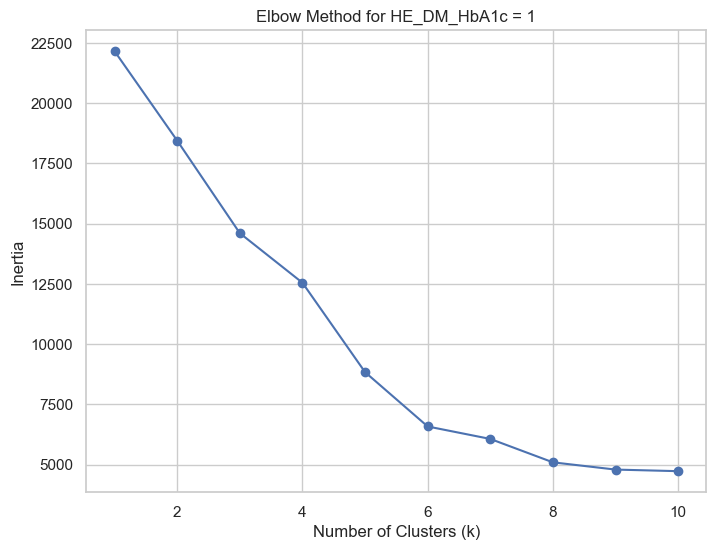

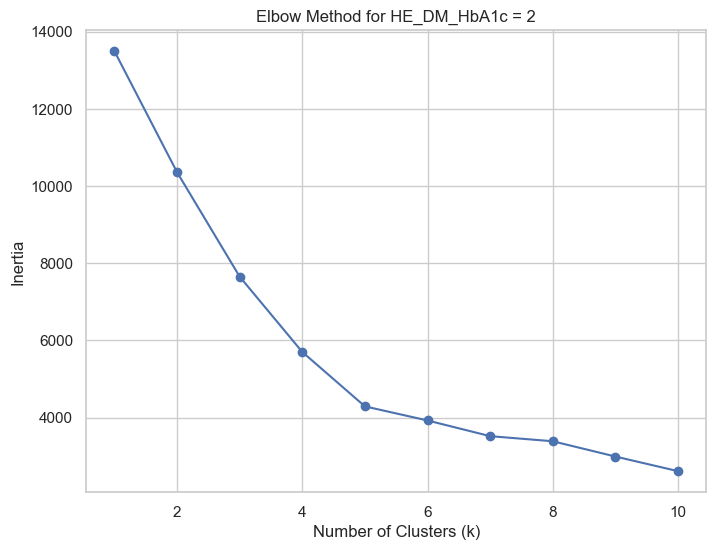

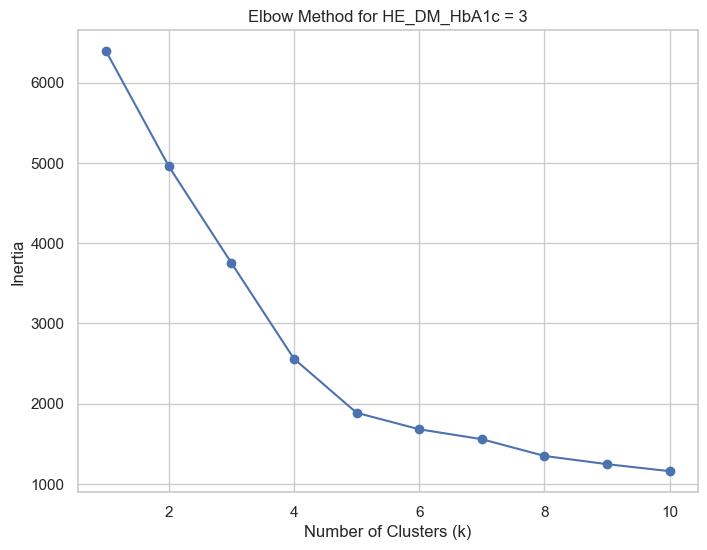

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 피처 표준화
scaler = StandardScaler()

# 클러스터 수 범위 설정 (예: 1~10)
k_range = range(1, 11)

# 결과를 저장할 데이터프레임 준비
df_clustering['Cluster'] = np.nan

#selected_cols = knn_columns + ["BD1_11","tobacco","BE5_1","LS_VEG1"]
selected_cols = ["BD1_11","tobacco","BE5_1","LS_VEG1"]

for HE_DM_HbA1c_value in [1, 2, 3, 4]:
    # HE_DM_HbA1c 값에 해당하는 데이터 추출
    HE_DM_HbA1c_df = df_clustering[df_clustering['HE_DM_HbA1c'] == HE_DM_HbA1c_value][selected_cols].copy()

    if not HE_DM_HbA1c_df.empty:
        # 데이터 표준화
        scaled_df = scaler.fit_transform(HE_DM_HbA1c_df)

        # 엘보우 방법: 각 k에 대해 관성(Inertia) 계산
        inertias = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_df)
            inertias.append(kmeans.inertia_)

        # 엘보우 플롯 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertias, marker='o')
        plt.title(f'Elbow Method for HE_DM_HbA1c = {HE_DM_HbA1c_value}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        # 최적 k 선택 (예: 관성 감소율 기반)
        # 여기서는 수동으로 플롯을 보고 k를 선택하거나, 자동화된 방법을 사용할 수 있음
        # 예: 관성 감소율이 완만해지는 k를 선택 (임시로 k=3으로 설정, 실제로는 플롯 확인 후 결정)
        optimal_k = 3  # TODO: 엘보우 플롯을 보고 직접 선택하거나 자동화 필요

        # 최적 k로 K-means 군집화 수행
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(scaled_df)

        # 클러스터 결과 저장
        df_clustering.loc[HE_DM_HbA1c_df.index, 'Cluster'] = clusters


--- Processing HE_DM_HbA1c = 1 with k = 3 ---
Silhouette Score for HE_DM_HbA1c = 1 (k=3): 0.4109
Cluster Characteristics (Mean values for HE_DM_HbA1c = 1, k=3):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             26.013503   0.394443     0.158660          794.664503
1            150.984326  13.064263     0.573668          760.689655
2             38.095238   0.758095     3.883810          849.423810
------------------------------------------------------------


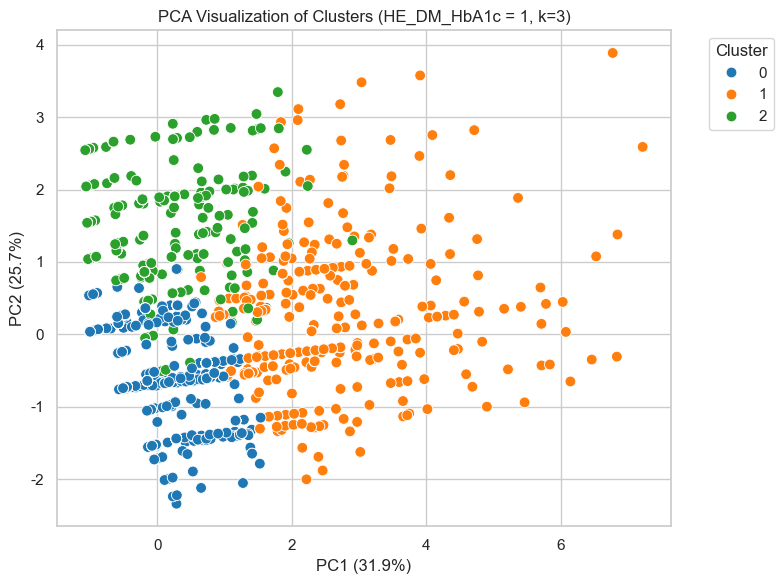


--- Processing HE_DM_HbA1c = 2 with k = 5 ---
Silhouette Score for HE_DM_HbA1c = 2 (k=5): 0.5053
Cluster Characteristics (Mean values for HE_DM_HbA1c = 2, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             22.475352   0.237676     0.127641         1095.000000
1             75.544615  18.473846     0.430769          804.707692
2             30.270134   0.600671     0.184564          661.642617
3             32.056680   0.823887     4.303644          911.809717
4            286.000000   6.004405     0.762115          843.242291
------------------------------------------------------------


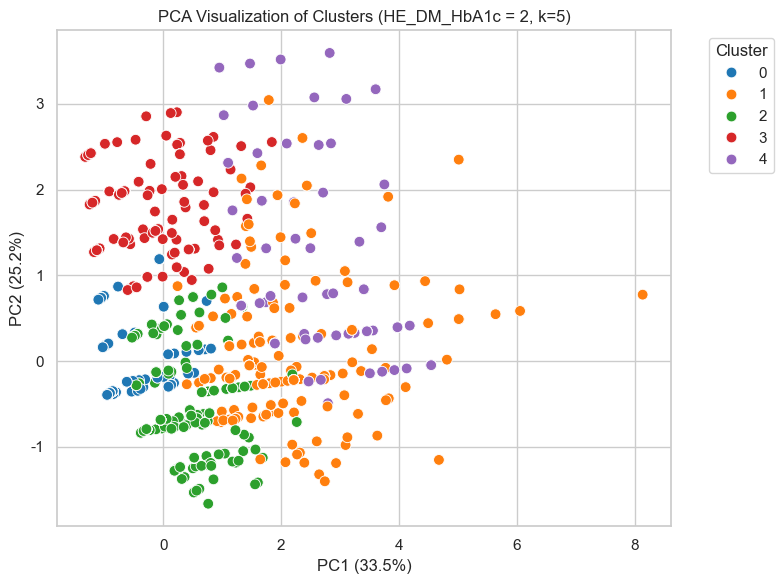


--- Processing HE_DM_HbA1c = 3 with k = 5 ---
Silhouette Score for HE_DM_HbA1c = 3 (k=5): 0.5656
Cluster Characteristics (Mean values for HE_DM_HbA1c = 3, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             18.438519   0.410370     0.105185         1095.000000
1             20.296460   0.738938     0.154867          675.630531
2             34.205357   2.084821     4.321429          966.272321
3            286.000000   5.470588     0.784314          901.764706
4             77.365517  20.779310     0.220690          804.434483
------------------------------------------------------------


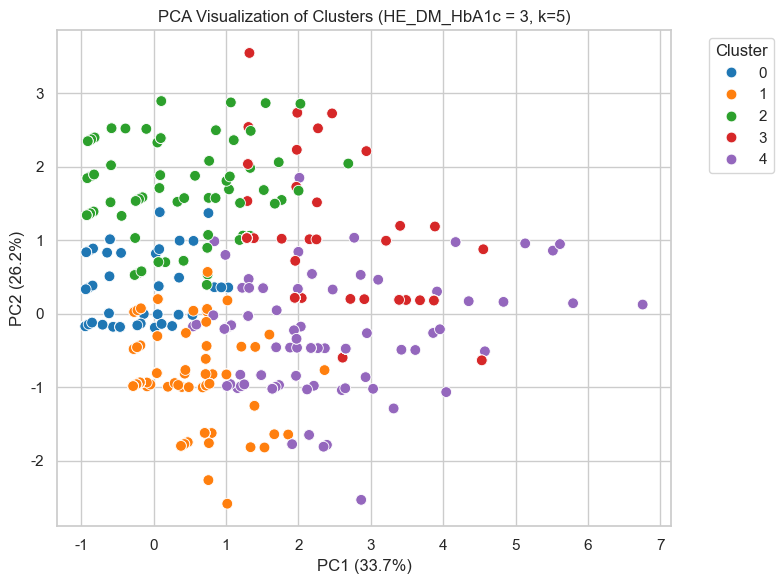

In [25]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd # pandas 필요
import matplotlib.pyplot as plt # matplotlib 필요
from sklearn.cluster import KMeans # KMeans 필요
# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
from sklearn.metrics import silhouette_score


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량',
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도'
}

# 시각화용 설정
sns.set(style="whitegrid")

# HE_DM_HbA1c 별로 반복
for HE_DM_HbA1c_value, optimal_k in zip([1, 2, 3], [3, 5, 5]):
    print(f"\n--- Processing HE_DM_HbA1c = {HE_DM_HbA1c_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함 (예: selected_cols = ['HE_sbp1', '...', 'LS_VEG1'])
    # df_clustering는 이전에 로드/처리되어 있어야 함
    # scaler는 이전에 fit 되어 있어야 함
    HE_DM_HbA1c_df = df_clustering[df_clustering['HE_DM_HbA1c'] == HE_DM_HbA1c_value][selected_cols].copy()
    # 이 변수는 현재 코드 플로우에서 직접 사용되지 않습니다. (기존 클러스터 라벨)
    # cluster_labels = df_clustering[df_clustering['HE_HP'] == hp_value]['Cluster']


    if not HE_DM_HbA1c_df.empty:
        # 표준화
        scaled_df = scaler.fit_transform(HE_DM_HbA1c_df)

        # ====== 여기에서 optimal_k 값을 사용하여 클러스터링 수행 ======
        # K-Means 예시
        # n_init='auto' 또는 숫자로 지정 (최신 sklearn 버전 권장)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        if optimal_k > 1 and scaled_df.shape[0] > 1: # 데이터 포인트가 1개보다 많아야 계산 가능
                silhouette_avg = silhouette_score(scaled_df, new_cluster_labels)
                print(f"Silhouette Score for HE_DM_HbA1c = {HE_DM_HbA1c_value} (k={optimal_k}): {silhouette_avg:.4f}")
        else:
            if optimal_k <= 1:
                print(f"Silhouette Score cannot be calculated for k = {optimal_k} (must be > 1).")
            else: # scaled_df.shape[0] <= 1
                 print(f"Silhouette Score cannot be calculated for HE_DM_HbA1c = {HE_DM_HbA1c_value}: Insufficient data points ({scaled_df.shape[0]}).")

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 새로 생성된 클러스터 라벨 추가
        # 인덱스가 맞아야 함 (위에서 같은 필터링 기준으로 슬라이싱했으므로 일치한다고 가정)
        HE_DM_HbA1c_with_labels = HE_DM_HbA1c_df.copy() # 원본 hp_df 변경 방지를 위해 복사
        HE_DM_HbA1c_with_labels['New_Cluster'] = new_cluster_labels

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = HE_DM_HbA1c_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_DM_HbA1c = {HE_DM_HbA1c_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 new_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = new_cluster_labels

        # PCA 2차원 축소
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df)

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 새로 생성된 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        plt.title(f'PCA Visualization of Clusters (HE_DM_HbA1c = {HE_DM_HbA1c_value}, k={optimal_k})') # 제목에 k값 추가
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

3개 방법 비교 


--- Processing HE_DM_HbA1c = 1 with k = 3 ---
Comparing algorithms for k = 3:
  - KMeans: Silhouette Score = 0.3384
  - Agglomerative: Silhouette Score = 0.3656
  - MiniBatchKMeans: Silhouette Score = 0.3468

Best algorithm for HE_DM_HbA1c = 1 (k=3): Agglomerative (Silhouette Score: 0.3656)
Cluster Characteristics (Mean values for HE_DM_HbA1c = 1, k=3):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             26.820081   0.211398     0.158480          785.480054
1            122.514970  11.558084     0.813174          804.461078
2             34.714426   0.215898     3.721295          855.003925
------------------------------------------------------------


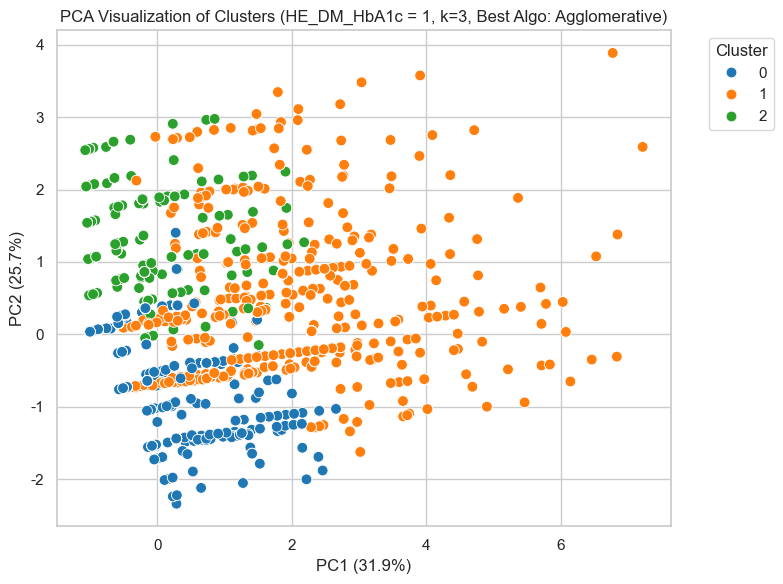


--- Processing HE_DM_HbA1c = 2 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.5040
  - Agglomerative: Silhouette Score = 0.4362
  - MiniBatchKMeans: Silhouette Score = 0.5040

Best algorithm for HE_DM_HbA1c = 2 (k=5): KMeans (Silhouette Score: 0.5040)
Cluster Characteristics (Mean values for HE_DM_HbA1c = 2, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             74.756014  19.463918     0.439863          793.367698
1             30.330852   0.732837     0.188586          662.603805
2             32.254545   0.842424     4.301010          911.442424
3             23.968750   0.373264     0.126736         1095.000000
4            286.000000   6.004405     0.762115          843.242291
------------------------------------------------------------


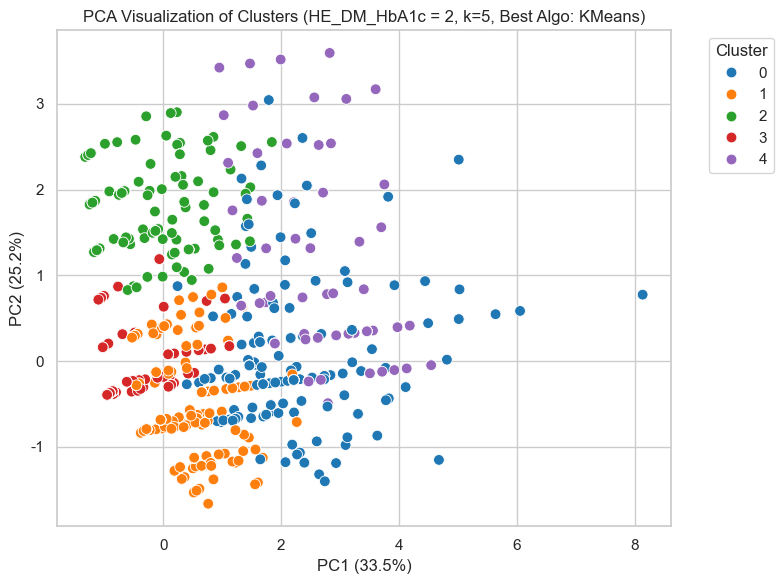


--- Processing HE_DM_HbA1c = 3 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.5656
  - Agglomerative: Silhouette Score = 0.5289
  - MiniBatchKMeans: Silhouette Score = 0.5636

Best algorithm for HE_DM_HbA1c = 3 (k=5): KMeans (Silhouette Score: 0.5656)
Cluster Characteristics (Mean values for HE_DM_HbA1c = 3, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             18.438519   0.410370     0.105185         1095.000000
1             20.296460   0.738938     0.154867          675.630531
2             34.205357   2.084821     4.321429          966.272321
3            286.000000   5.470588     0.784314          901.764706
4             77.365517  20.779310     0.220690          804.434483
------------------------------------------------------------


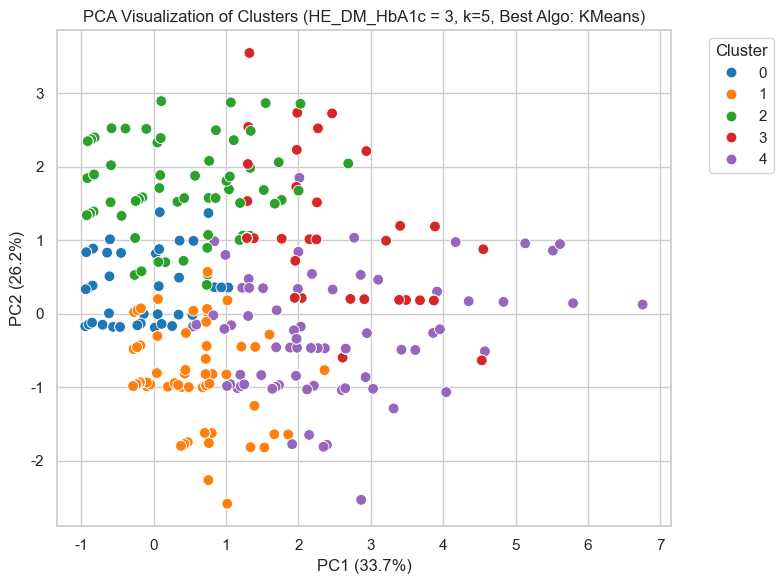


--- Processing complete ---


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # For silhouette plot colors
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MiniBatchKMeans # AgglomerativeClustering, DBSCAN, MiniBatchKMeans 임포트 추가
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# RandomForestClassifier는 이 특정 스니펫에서 직접 사용되지 않으므로 주석 처리하거나 필요에 따라 유지
# from sklearn.ensemble import RandomForestClassifier

# 통계 분석을 위한 라이브러리 임포트 (이 스니펫에서 직접 사용되지는 않음)
# from scipy import stats
# import statsmodels.api as sm
# from statsmodels.stats.contingency_tables import Table

# 시각화 설정
sns.set(style="whitegrid")

# 전처리 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def preprocess_data(df, original_numeric_cols, original_categorical_cols): ...

# select_features 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def select_features(df, columns, corr_threshold=0.8): ...

# compute_feature_importance 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def compute_feature_importance(df_processed, selected_cols, cluster_labels): ...

# visualize_silhouette 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def visualize_silhouette(cluster_lists, X_features): ...

# run_clustering_iteration 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def run_clustering_iteration(df_original, features_to_use, original_numeric_cols, original_categorical_cols, n_clusters, algorithm): ...


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
# 이 딕셔너리는 selected_cols에 있는 피처 이름에 대한 설명을 포함해야 합니다.
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량', # 이 피처가 selected_cols에 있는지 확인 필요
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도',
    # selected_cols에 포함된 다른 피처들도 여기에 추가해야 합니다.
    'age': '나이', 'sex': '성별', 'HE_HbA1c': '당화혈색소', # 예시 추가
    # ... selected_cols에 있는 모든 피처에 대한 매핑 추가 ...
}

# 시각화 설정
sns.set(style="whitegrid")

# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
# 예시 정의 (실제 코드에서는 이전에 정의된 변수를 사용해야 합니다)
# df_clustering = pd.read_csv("your_clustering_data.csv") # 실제 파일 경로
# selected_cols = ['HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu', 'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'BD1_11', 'tobacco', 'BE5_1', 'LS_VEG1', 'age', 'sex', 'HE_HbA1c'] # 실제 selected_cols 목록
# scaler = StandardScaler() # 스케일러 객체 (fit 되어 있어야 함)
# df_clustering['HE_DM_HbA1c'] 칼럼이 존재하고, 그 값이 [1, 2, 3] 중에 있다고 가정합니다.


# 비교할 군집화 알고리즘 정의 (n_clusters를 사용하는 알고리즘)
# K-Means, Agglomerative, MiniBatchKMeans 포함
algorithms_to_compare = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'MiniBatchKMeans': MiniBatchKMeans,
    # DBSCAN은 n_clusters 기반 비교가 적합하지 않아 이 비교 루프에서는 제외합니다.
}


# HE_DM_HbA1c 별로 반복
# optimal_k 리스트는 각 HE_DM_HbA1c 값에 대해 미리 결정되어 있어야 합니다.
# 예: optimal_k_list = [3, 5, 5]
# HE_DM_HbA1c_values = [1, 2, 3] # 실제 HE_DM_HbA1c 고유값
# for HE_DM_HbA1c_value, optimal_k in zip(HE_DM_HbA1c_values, optimal_k_list):

for HE_DM_HbA1c_value, optimal_k in zip([1, 2, 3], [3, 5, 5]): # 제공해주신 예시 값 사용
    print(f"\n--- Processing HE_DM_HbA1c = {HE_DM_HbA1c_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함
    # df_clustering는 이전에 로드/처리되어 있어야 함
    HE_DM_HbA1c_df = df_clustering[df_clustering['HE_DM_HbA1c'] == HE_DM_HbA1c_value][selected_cols].copy()

    if not HE_DM_HbA1c_df.empty:
        # 표준화 (각 그룹별로 스케일링)
        # scaler는 이전에 fit 되어 있어야 하지만, 여기서는 각 그룹별로 fit_transform을 다시 수행합니다.
        # 만약 전체 데이터로 fit 했다면 여기서 transform만 사용해야 합니다.
        # 제공해주신 코드 형태대로 매 그룹별로 fit_transform 하는 경우를 따릅니다.
        scaled_df = scaler.fit_transform(HE_DM_HbA1c_df)

        # --- 다양한 군집화 알고리즘 비교 ---
        best_score = -1 # 가장 높은 실루엣 점수 추적
        best_labels = None # 가장 좋은 알고리즘의 클러스터 라벨 추적
        best_algo_name = None # 가장 좋은 알고리즘 이름 추적

        print(f"Comparing algorithms for k = {optimal_k}:")

        for algo_name, algo_class in algorithms_to_compare.items():
            try:
                # 클러스터 개수가 1개보다 많고, 데이터 포인트가 1개보다 많을 때만 유효한 비교
                if optimal_k > 1 and scaled_df.shape[0] > 1:
                    # 알고리즘 인스턴스 생성
                    if algo_name in ['KMeans', 'MiniBatchKMeans']: # KMeans 또는 MiniBatchKMeans
                        # n_init='auto' 또는 숫자로 지정 필요
                        model = algo_class(n_clusters=optimal_k, random_state=42, n_init='auto')
                    else: # Agglomerative Clustering
                        # Agglomerative Clustering은 n_init 매개변수 없음
                        model = algo_class(n_clusters=optimal_k)

                    # 클러스터링 수행
                    current_labels = model.fit_predict(scaled_df)

                    # 실루엣 점수 계산
                    # DBSCAN과 달리 이 알고리즘들은 모든 데이터에 라벨을 할당하므로 노이즈 제외 로직은 필요 없습니다.
                    current_score = silhouette_score(scaled_df, current_labels)
                    print(f"  - {algo_name}: Silhouette Score = {current_score:.4f}")

                    # 가장 높은 점수 업데이트
                    if current_score > best_score:
                        best_score = current_score
                        best_labels = current_labels # 현재 알고리즘의 라벨 저장
                        best_algo_name = algo_name # 현재 알고리즘 이름 저장

                else:
                    # 클러스터 개수가 1개 이하이거나 데이터 포인트가 부족하면 실루엣 점수 계산 불가
                    print(f"  - {algo_name}: Silhouette Score not computable (k<2 or insufficient data).")
                    # best_score는 여전히 -1 (초기값) 유지

            except Exception as e:
                print(f"  - {algo_name} failed: {e}")
                # 오류 발생 시 해당 알고리즘은 무시하고 계속 진행

        # --- 가장 높은 실루엣 점수를 가진 알고리즘의 결과 사용 ---
        if best_labels is not None:
            print(f"\nBest algorithm for HE_DM_HbA1c = {HE_DM_HbA1c_value} (k={optimal_k}): {best_algo_name} (Silhouette Score: {best_score:.4f})")
            final_cluster_labels = best_labels # 가장 좋은 라벨 사용
        else:
            print(f"\nCould not find a suitable clustering result for HE_DM_HbA1c = {HE_DM_HbA1c_value} (k={optimal_k}). Skipping analysis for this group.")
            continue # 이 그룹에 대한 분석 건너뛰기

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 최종 클러스터 라벨 추가
        # 인덱스가 맞아야 함
        HE_DM_HbA1c_df_with_labels = HE_DM_HbA1c_df.copy() # 원본 df 변경 방지를 위해 복사
        HE_DM_HbA1c_df_with_labels['New_Cluster'] = final_cluster_labels # 가장 좋은 라벨 사용

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = HE_DM_HbA1c_df_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_DM_HbA1c = {HE_DM_HbA1c_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 final_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = final_cluster_labels

        # PCA 2차원 축소
        # 스케일링된 데이터를 PCA에 사용
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df) # 스케일링된 데이터를 PCA에 사용

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 최종 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        # 제목에 HE_DM_HbA1c 값, k값, 사용된 알고리즘 이름 추가
        plt.title(f'PCA Visualization of Clusters (HE_DM_HbA1c = {HE_DM_HbA1c_value}, k={optimal_k}, Best Algo: {best_algo_name})')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    else:
        print(f"No data for HE_DM_HbA1c = {HE_DM_HbA1c_value}")
        print("-" * 60) # 구분선

print("\n--- Processing complete ---")


비만

In [27]:
# HE_obe 결측치 행 제거
df_clustering = df.dropna(subset=['HE_obe'])

columns_to_drop = ['occp', 'HE_Ualb', 'HE_HTG', 'HE_HCHOL', 'HE_fh', 'HE_DMfh1', 'HE_DMfh2',
                   'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2']
df_clustering = df_clustering.drop(columns=columns_to_drop, errors='ignore')

low_missing_columns = [
    'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

In [28]:
# 이전에 low_missing_columns, df_clustering가 정의되었다고 가정합니다.

low_missing_columns = [
 'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

print("--- Checking and filling NaNs ---")
print("Initial NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())
print("-" * 30)

# NaN을 각 컬럼의 최빈값으로 df_clustering에서 대체
for col in low_missing_columns:
    print(f"\nProcessing column: '{col}'")
    if col not in df_clustering.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")
        continue # 다음 컬럼으로 넘어감

    initial_nan_count = df_clustering[col].isnull().sum()
    print(f"  NaN count before filling: {initial_nan_count}")

    mode_value = df_clustering[col].mode(dropna=True)

    if not mode_value.empty:
        fill_value = mode_value[0]
        print(f"  Calculated mode value: {fill_value} (Type: {type(fill_value)})")

        # 실제로 NaN이 있는 경우에만 fillna 시도
        if initial_nan_count > 0:
             df_clustering[col].fillna(fill_value, inplace=True)
             print(f"  Filled {initial_nan_count} NaN values with {fill_value}.")
        else:
             print(f"  No NaN values found to fill in '{col}'.")

        final_nan_count = df_clustering[col].isnull().sum()
        print(f"  NaN count after filling: {final_nan_count}")

        # 만약 final_nan_count가 0이 아니라면, 채워지지 않은 NaN이 있다는 뜻
        if final_nan_count > 0:
            print(f"  Note: {final_nan_count} NaN values remain in '{col}'. They might not be standard np.nan.")

    else:
        print(f"  Could not determine mode for '{col}' (column might be all NaNs or empty after dropna). No filling performed.")
        print(f"  NaN count after check: {df_clustering[col].isnull().sum()}")


print("\n--- Filling process finished ---")
print("Final NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())

# 추가 확인: NaN이 아닌 다른 형태의 누락된 값 확인 (예: 빈 문자열 '')
print("\n--- Checking for other potential missing value representations ---")
for col in low_missing_columns:
     if df_clustering[col].dtype == 'object': # 문자열 타입 컬럼인 경우
         print(f"Checking column '{col}' (object dtype):")
         # 빈 문자열 또는 'NA' 등 의심스러운 값의 개수를 세어봅니다.
         print(f"  Count of empty strings (''): {df_clustering[col].eq('').sum()}")
         # 다른 일반적이지 않은 값들을 value_counts로 확인
         print("  Top values (including non-standard):")
         print(df_clustering[col].value_counts(dropna=False).head()) # dropna=False 포함

--- Checking and filling NaNs ---
Initial NaN count for specified columns:
BE5_1      899
BD1_11     179
LS_VEG1    453
tobacco    189
dtype: int64
------------------------------

Processing column: 'BE5_1'
  NaN count before filling: 899
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 899 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'BD1_11'
  NaN count before filling: 179
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 179 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'LS_VEG1'
  NaN count before filling: 453
  Calculated mode value: 730.0 (Type: <class 'numpy.float64'>)
  Filled 453 NaN values with 730.0.
  NaN count after filling: 0

Processing column: 'tobacco'
  NaN count before filling: 189
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 189 NaN values with 0.0.
  NaN count after filling: 0

--- Filling process finished ---
Final NaN count for specified columns:
BE5

In [29]:
            
knn_columns = [
    'HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu',
    'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]

from sklearn.impute import KNNImputer

# HE_obe별로 데이터 분리 및 KNN Imputation
for HE_obe_value in [1, 2, 3, 4, 5, 6 ]:
    # HE_obe 값에 해당하는 데이터 추출
    HE_obe_df = df_clustering[df_clustering['HE_obe'] == HE_obe_value][knn_columns].copy()
    if not HE_obe_df.empty:
        # 비해당/모름 값 NaN으로 변환
        HE_obe_df = HE_obe_df.replace([888, 999], np.nan)
        # KNN Imputation
        imputer = KNNImputer(n_neighbors=5, weights="uniform")
        HE_obe_imputed = imputer.fit_transform(HE_obe_df)
        HE_obe_imputed_df = pd.DataFrame(HE_obe_imputed, columns=knn_columns, index=HE_obe_df.index)
        # 원본 데이터에 반영
        df_clustering.loc[HE_obe_df.index, knn_columns] =  HE_obe_imputed_df


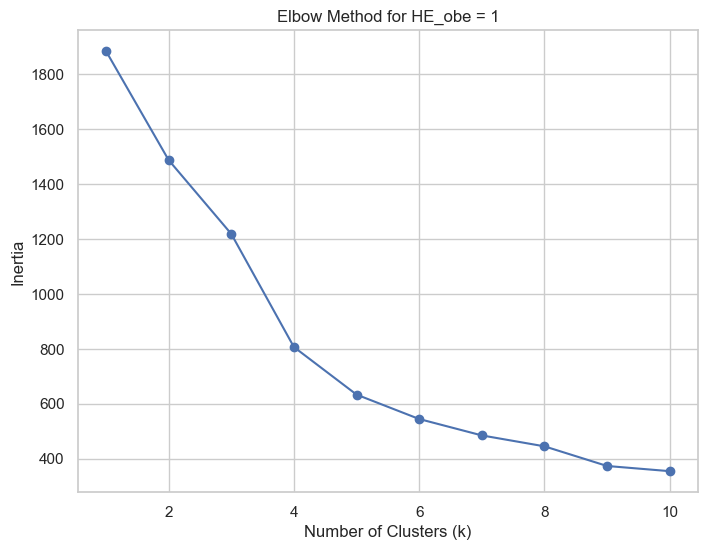

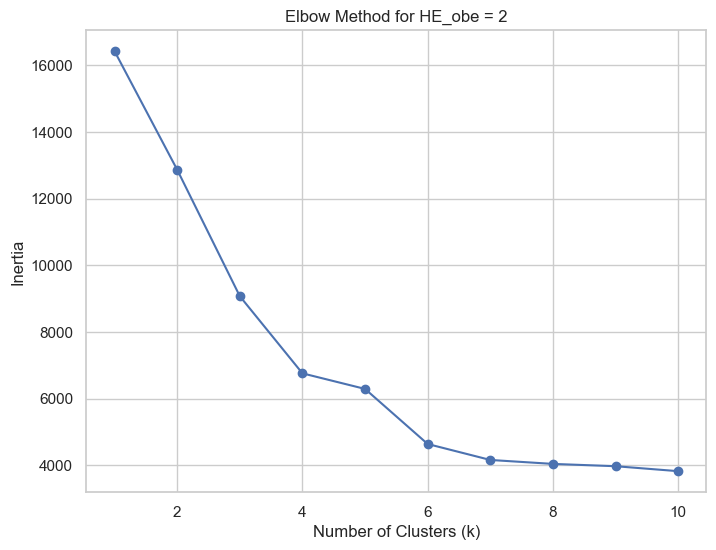

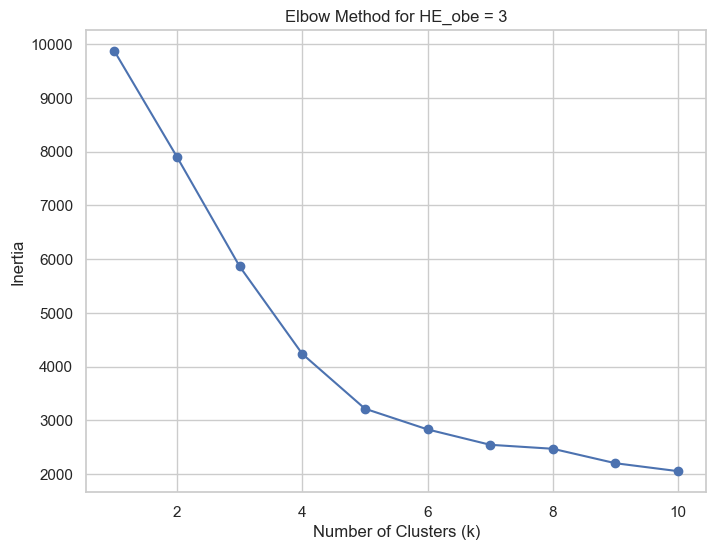

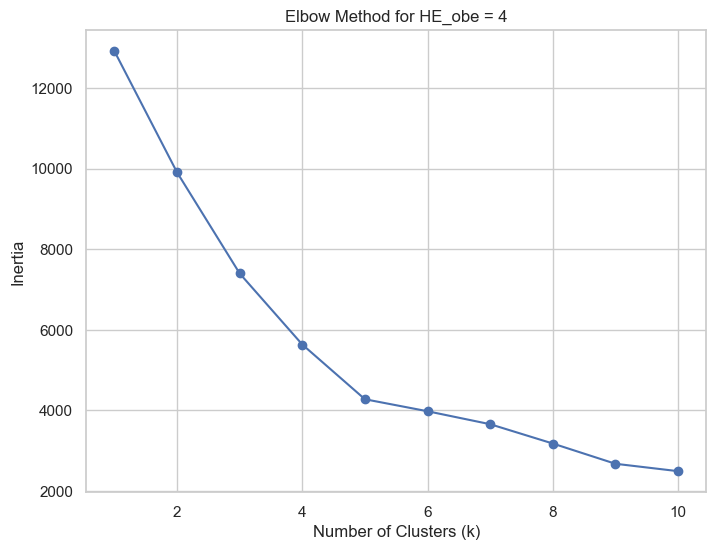

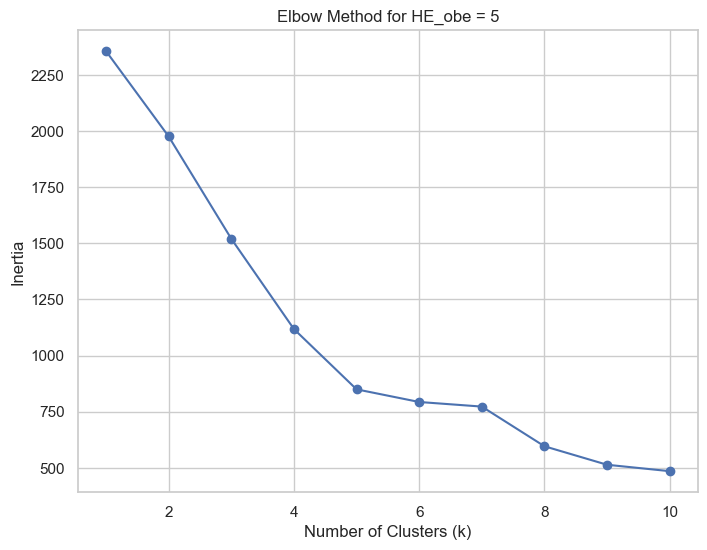

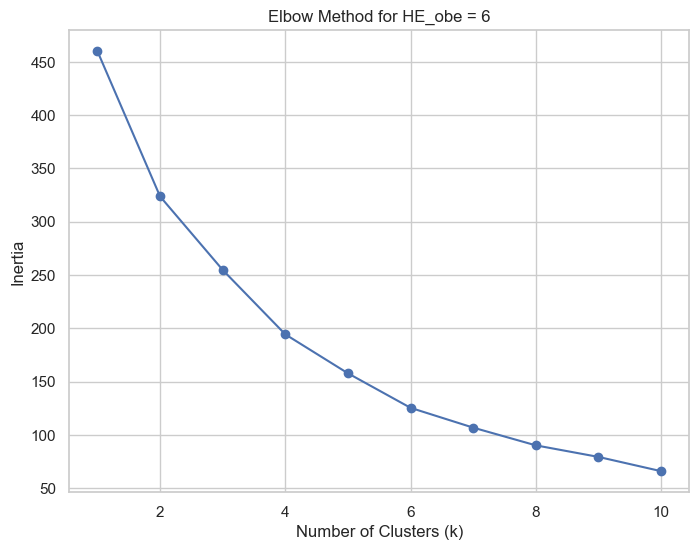

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 피처 표준화
scaler = StandardScaler()

# 클러스터 수 범위 설정 (예: 1~10)
k_range = range(1, 11)

# 결과를 저장할 데이터프레임 준비
df_clustering['Cluster'] = np.nan

#selected_cols = knn_columns + ["BD1_11","tobacco","BE5_1","LS_VEG1"]
selected_cols = ["BD1_11","tobacco","BE5_1","LS_VEG1"]

for HE_obe_value in [1, 2, 3, 4, 5, 6]:
    # HE_obe 값에 해당하는 데이터 추출
    HE_obe_df = df_clustering[df_clustering['HE_obe'] == HE_obe_value][selected_cols].copy()

    if not HE_obe_df.empty:
        # 데이터 표준화
        scaled_df = scaler.fit_transform(HE_obe_df)

        # 엘보우 방법: 각 k에 대해 관성(Inertia) 계산
        inertias = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_df)
            inertias.append(kmeans.inertia_)

        # 엘보우 플롯 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertias, marker='o')
        plt.title(f'Elbow Method for HE_obe = {HE_obe_value}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        # 최적 k 선택 (예: 관성 감소율 기반)
        # 여기서는 수동으로 플롯을 보고 k를 선택하거나, 자동화된 방법을 사용할 수 있음
        # 예: 관성 감소율이 완만해지는 k를 선택 (임시로 k=3으로 설정, 실제로는 플롯 확인 후 결정)
        optimal_k = 3  # TODO: 엘보우 플롯을 보고 직접 선택하거나 자동화 필요

        # 최적 k로 K-means 군집화 수행
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(scaled_df)

        # 클러스터 결과 저장
        df_clustering.loc[HE_obe_df.index, 'Cluster'] = clusters


--- Processing HE_obe = 1 with k = 4 ---
Silhouette Score for HE_obe = 1 (k=4): 0.4342
Cluster Characteristics (Mean values for HE_obe = 1, k=4):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             29.081545   0.682403     0.283262          642.596567
1             19.125000   0.765625     4.265625          817.984375
2             16.274194   0.475806     0.120968         1095.000000
3            161.560000  14.120000     0.400000          772.740000
------------------------------------------------------------


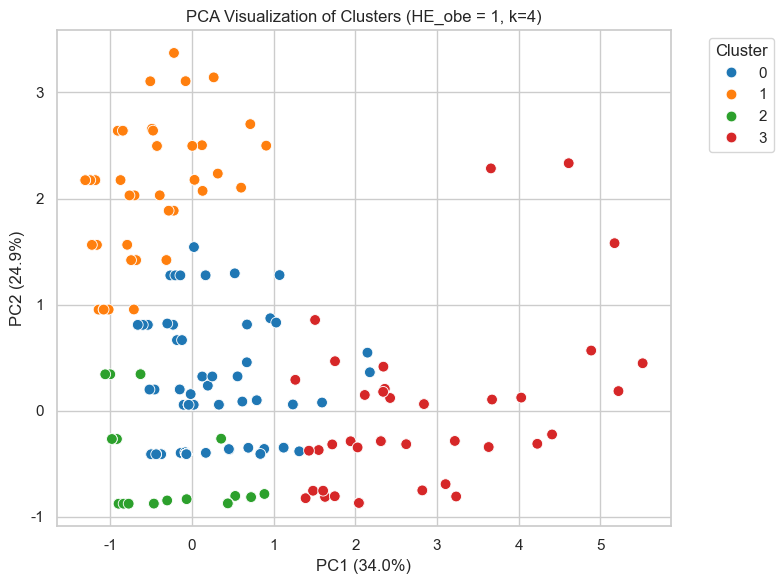


--- Processing HE_obe = 2 with k = 4 ---
Silhouette Score for HE_obe = 2 (k=4): 0.4622
Cluster Characteristics (Mean values for HE_obe = 2, k=4):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0            176.923434  13.626450     0.424594          804.758701
1             27.798186   0.636621     0.247166          655.140023
2             33.855244   0.740030     4.193501          884.502216
3             18.635332   0.444895     0.154781         1095.000000
------------------------------------------------------------


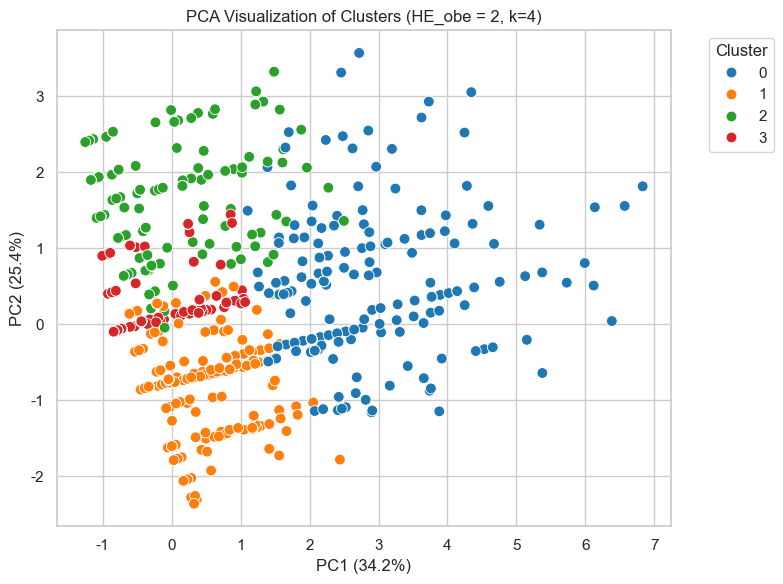


--- Processing HE_obe = 3 with k = 5 ---
Silhouette Score for HE_obe = 3 (k=5): 0.4891
Cluster Characteristics (Mean values for HE_obe = 3, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             22.471464   0.450372     0.147643         1095.000000
1             30.909091   0.575758     0.207792          649.239177
2            286.000000   5.181208     0.919463          862.100671
3             33.690355   0.890863     4.233503          892.710660
4             77.415385  19.882051     0.569231          792.830769
------------------------------------------------------------


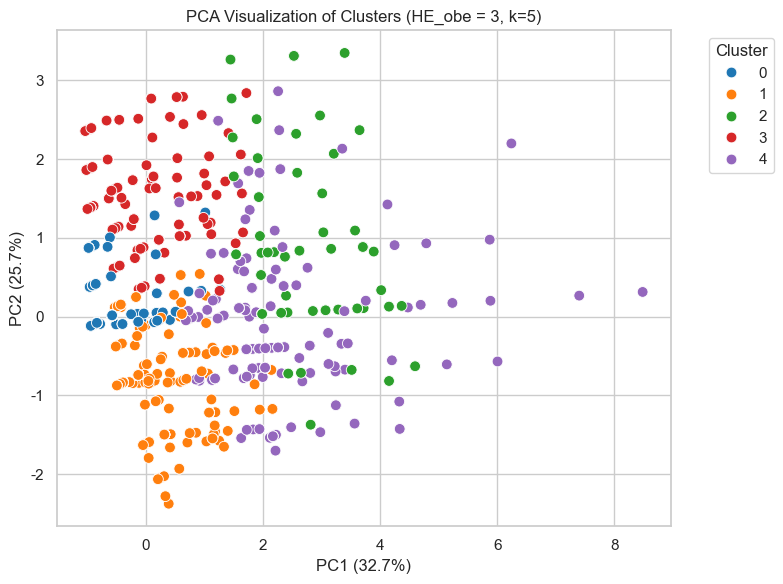


--- Processing HE_obe = 4 with k = 5 ---
Silhouette Score for HE_obe = 4 (k=5): 0.4859
Cluster Characteristics (Mean values for HE_obe = 4, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0            286.000000   5.094241     0.879581          838.926702
1             30.026134   0.694850     0.225980          659.186779
2             39.646552   1.032328     4.258621          881.306034
3             23.777328   0.393725     0.110324         1095.000000
4             71.598592  19.514085     0.654930          787.503521
------------------------------------------------------------


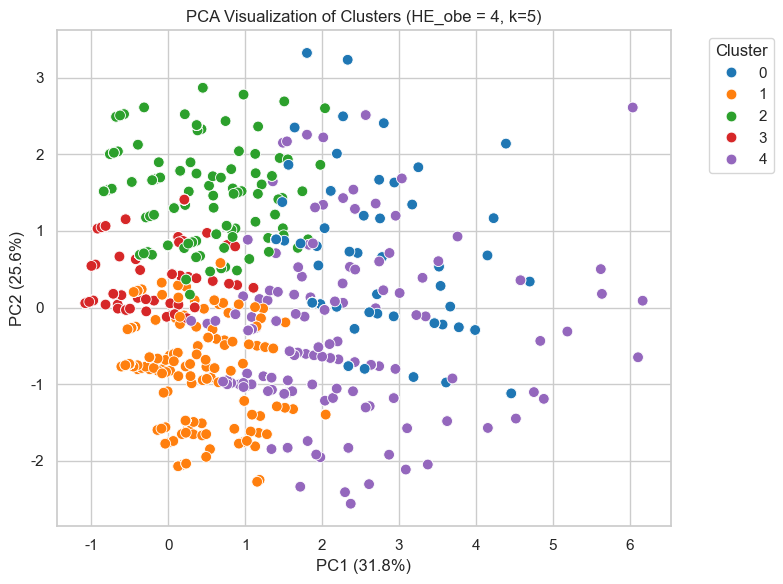


--- Processing HE_obe = 5 with k = 5 ---
Silhouette Score for HE_obe = 5 (k=5): 0.4648
Cluster Characteristics (Mean values for HE_obe = 5, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             27.430712   0.951311     0.127341          649.131086
1             24.763158   0.190789     0.157895         1095.000000
2            286.000000   4.147059     0.617647          809.735294
3             51.420290  20.043478     0.304348          721.289855
4             43.552239   2.164179     4.074627          775.910448
------------------------------------------------------------


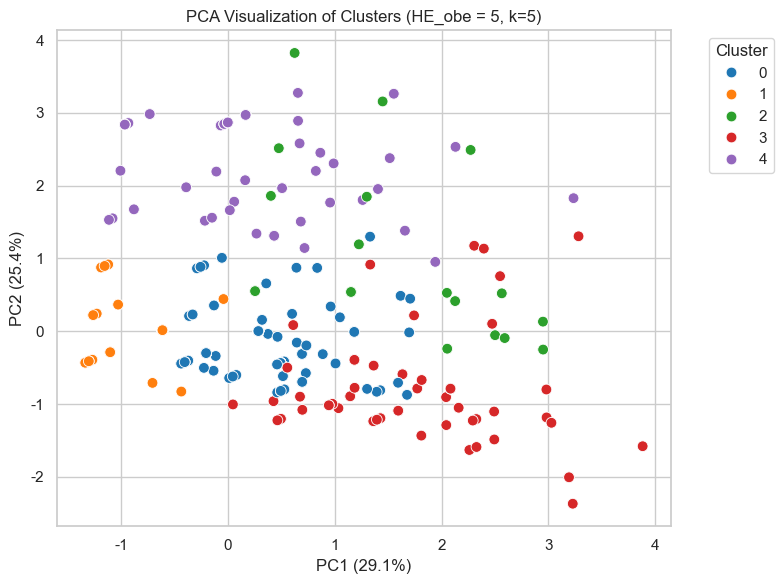


--- Processing HE_obe = 6 with k = 2 ---
Silhouette Score for HE_obe = 6 (k=2): 0.5101
Cluster Characteristics (Mean values for HE_obe = 6, k=2):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             21.434343   3.575758     0.090909          769.222222
1            157.875000  10.312500     3.250000          821.250000
------------------------------------------------------------


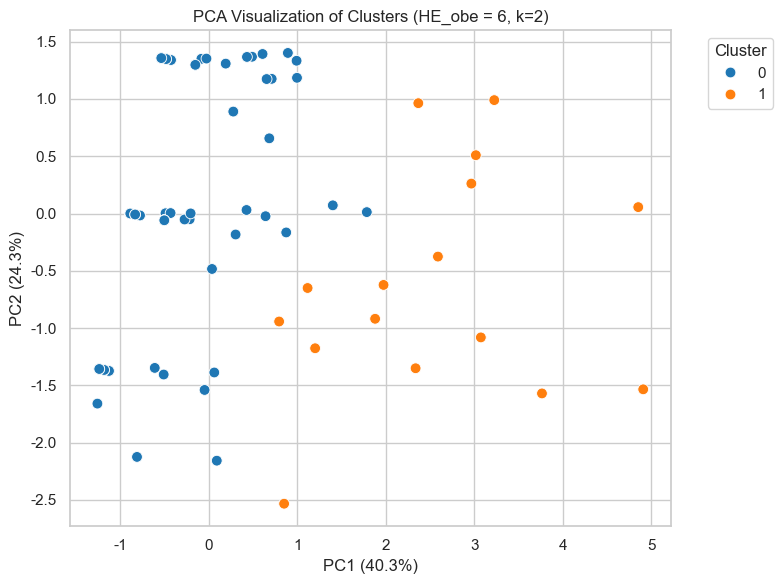

In [31]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd # pandas 필요
import matplotlib.pyplot as plt # matplotlib 필요
from sklearn.cluster import KMeans # KMeans 필요
# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
from sklearn.metrics import silhouette_score


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량',
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도'
}

# 시각화용 설정
sns.set(style="whitegrid")

# HE_obe 별로 반복
for HE_obe_value, optimal_k in zip([1, 2, 3, 4, 5, 6], [4, 4, 5, 5, 5, 2]):
    print(f"\n--- Processing HE_obe = {HE_obe_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함 (예: selected_cols = ['HE_sbp1', '...', 'LS_VEG1'])
    # df_clustering는 이전에 로드/처리되어 있어야 함
    # scaler는 이전에 fit 되어 있어야 함
    HE_obe_df = df_clustering[df_clustering['HE_obe'] == HE_obe_value][selected_cols].copy()
    # 이 변수는 현재 코드 플로우에서 직접 사용되지 않습니다. (기존 클러스터 라벨)
    # cluster_labels = df_clustering[df_clustering['HE_HP'] == HE_obe_value]['Cluster']


    if not HE_obe_df.empty:
        # 표준화
        scaled_df = scaler.fit_transform(HE_obe_df)

        # ====== 여기에서 optimal_k 값을 사용하여 클러스터링 수행 ======
        # K-Means 예시
        # n_init='auto' 또는 숫자로 지정 (최신 sklearn 버전 권장)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        if optimal_k > 1 and scaled_df.shape[0] > 1: # 데이터 포인트가 1개보다 많아야 계산 가능
                silhouette_avg = silhouette_score(scaled_df, new_cluster_labels)
                print(f"Silhouette Score for HE_obe = {HE_obe_value} (k={optimal_k}): {silhouette_avg:.4f}")
        else:
            if optimal_k <= 1:
                print(f"Silhouette Score cannot be calculated for k = {optimal_k} (must be > 1).")
            else: # scaled_df.shape[0] <= 1
                 print(f"Silhouette Score cannot be calculated for HE_obe = {HE_obe_value}: Insufficient data points ({scaled_df.shape[0]}).")

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 새로 생성된 클러스터 라벨 추가
        # 인덱스가 맞아야 함 (위에서 같은 필터링 기준으로 슬라이싱했으므로 일치한다고 가정)
        HE_obe_df_with_labels = HE_obe_df.copy() # 원본 HE_obe_df 변경 방지를 위해 복사
        HE_obe_df_with_labels['New_Cluster'] = new_cluster_labels

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = HE_obe_df_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_obe = {HE_obe_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 new_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = new_cluster_labels

        # PCA 2차원 축소
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df)

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 새로 생성된 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        plt.title(f'PCA Visualization of Clusters (HE_obe = {HE_obe_value}, k={optimal_k})') # 제목에 k값 추가
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

3개 방법 비교 


--- Processing HE_obe = 1 with k = 4 ---
Comparing algorithms for k = 4:
  - KMeans: Silhouette Score = 0.4342
  - Agglomerative: Silhouette Score = 0.4360
  - MiniBatchKMeans: Silhouette Score = 0.4259

Best algorithm for HE_obe = 1 (k=4): Agglomerative (Silhouette Score: 0.4360)
Cluster Characteristics (Mean values for HE_obe = 1, k=4):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             12.932432   0.104730     0.179054          797.371622
1            177.357143   2.607143     0.321429          726.267857
2             17.111111   0.680556     3.930556          858.902778
3             66.042553  15.893617     0.425532          807.638298
------------------------------------------------------------


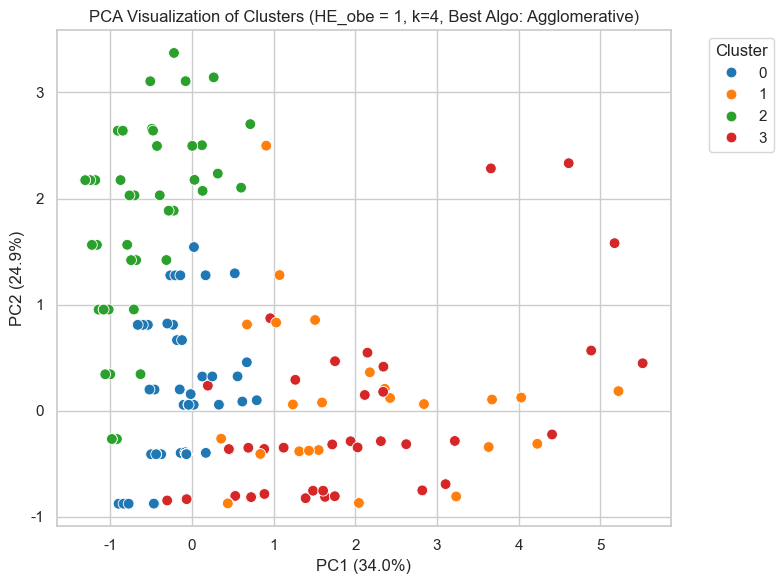


--- Processing HE_obe = 2 with k = 4 ---
Comparing algorithms for k = 4:
  - KMeans: Silhouette Score = 0.4622
  - Agglomerative: Silhouette Score = 0.4041
  - MiniBatchKMeans: Silhouette Score = 0.4597

Best algorithm for HE_obe = 2 (k=4): KMeans (Silhouette Score: 0.4622)
Cluster Characteristics (Mean values for HE_obe = 2, k=4):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0            176.923434  13.626450     0.424594          804.758701
1             27.798186   0.636621     0.247166          655.140023
2             33.855244   0.740030     4.193501          884.502216
3             18.635332   0.444895     0.154781         1095.000000
------------------------------------------------------------


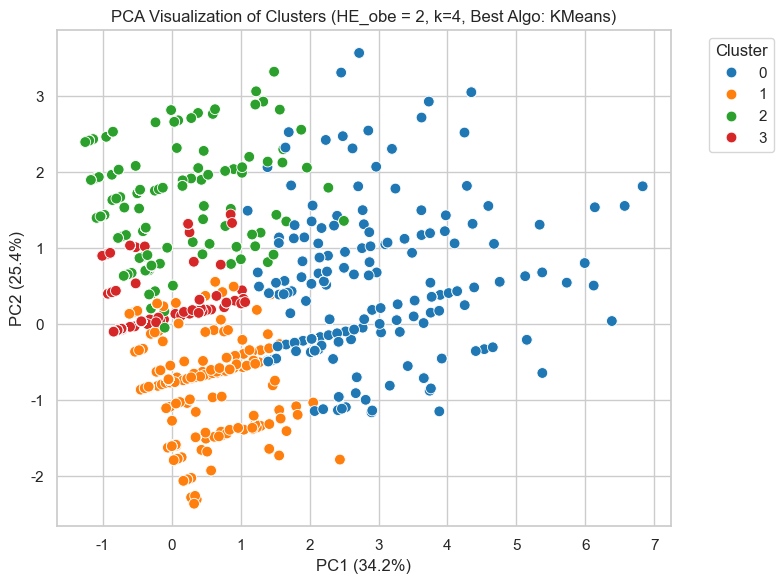


--- Processing HE_obe = 3 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.4891
  - Agglomerative: Silhouette Score = 0.4422
  - MiniBatchKMeans: Silhouette Score = 0.4894

Best algorithm for HE_obe = 3 (k=5): MiniBatchKMeans (Silhouette Score: 0.4894)
Cluster Characteristics (Mean values for HE_obe = 3, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             30.909091   0.575758     0.207792          649.239177
1             21.529412   0.366708     0.148936         1095.000000
2             33.601023   0.795396     4.237852          893.959079
3             78.741463  19.448780     0.595122          802.229268
4            286.000000   5.181208     0.919463          862.100671
------------------------------------------------------------


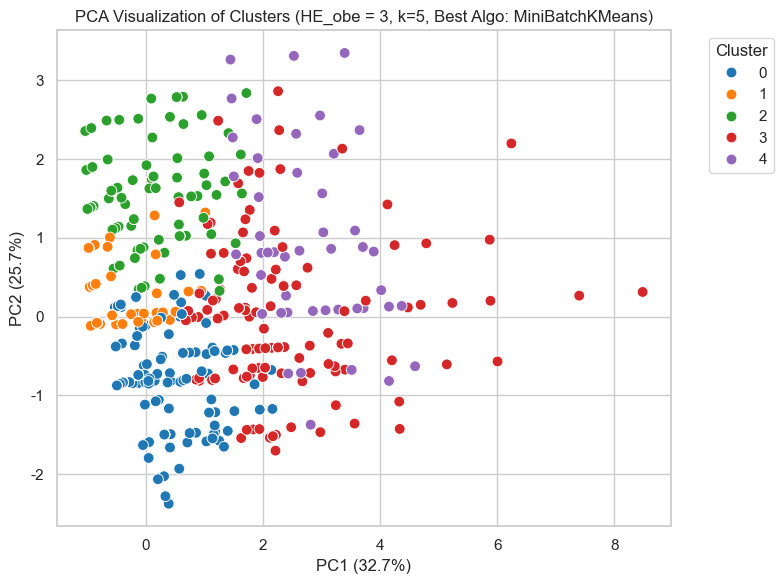


--- Processing HE_obe = 4 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.4859
  - Agglomerative: Silhouette Score = 0.4711
  - MiniBatchKMeans: Silhouette Score = 0.4846

Best algorithm for HE_obe = 4 (k=5): KMeans (Silhouette Score: 0.4859)
Cluster Characteristics (Mean values for HE_obe = 4, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0            286.000000   5.094241     0.879581          838.926702
1             30.026134   0.694850     0.225980          659.186779
2             39.646552   1.032328     4.258621          881.306034
3             23.777328   0.393725     0.110324         1095.000000
4             71.598592  19.514085     0.654930          787.503521
------------------------------------------------------------


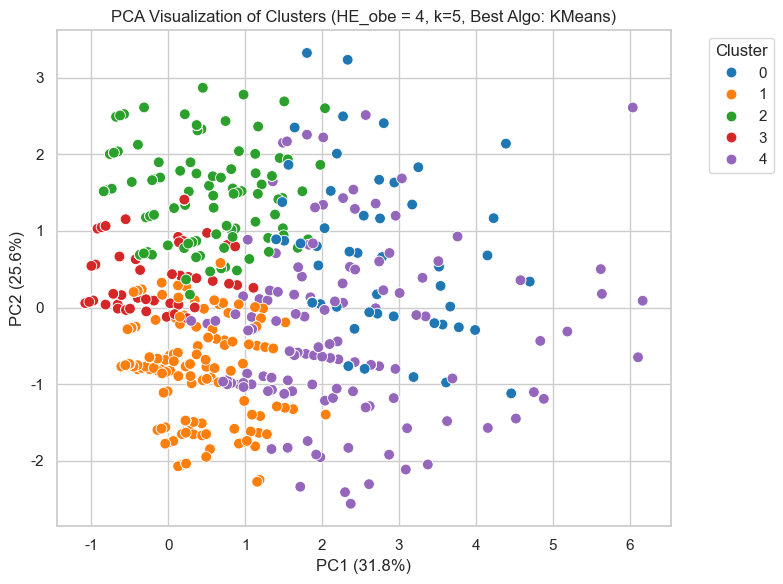


--- Processing HE_obe = 5 with k = 5 ---
Comparing algorithms for k = 5:
  - KMeans: Silhouette Score = 0.4417
  - Agglomerative: Silhouette Score = 0.4461
  - MiniBatchKMeans: Silhouette Score = 0.4162

Best algorithm for HE_obe = 5 (k=5): Agglomerative (Silhouette Score: 0.4461)
Cluster Characteristics (Mean values for HE_obe = 5, k=5):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             12.349776   0.919283     0.112108          637.618834
1             63.923077   3.564103     3.846154          723.628205
2            185.851852   2.061728     0.074074          810.456790
3             45.577465  18.098592     0.056338          786.549296
4              9.176471   0.125000     0.279412         1095.000000
------------------------------------------------------------


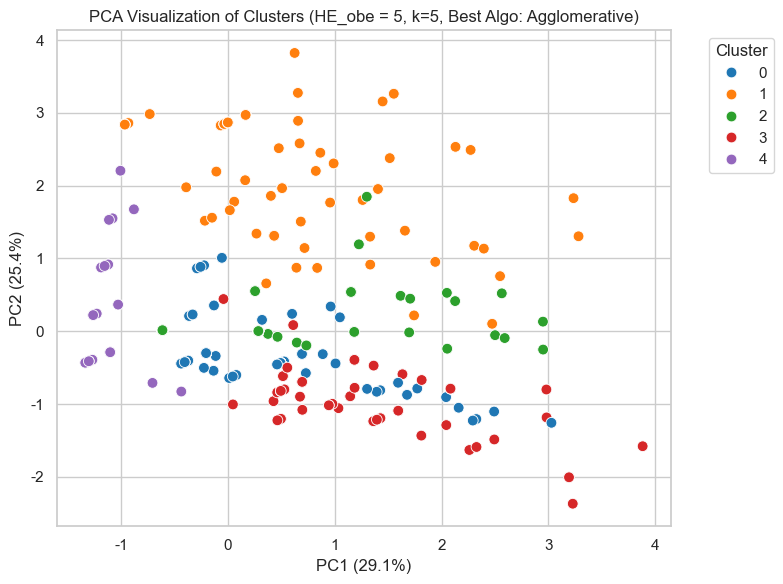


--- Processing HE_obe = 6 with k = 2 ---
Comparing algorithms for k = 2:
  - KMeans: Silhouette Score = 0.5152
  - Agglomerative: Silhouette Score = 0.5207
  - MiniBatchKMeans: Silhouette Score = 0.4672

Best algorithm for HE_obe = 6 (k=2): Agglomerative (Silhouette Score: 0.5207)
Cluster Characteristics (Mean values for HE_obe = 6, k=2):
             1년 간 음주 빈도   하루평균 흡연량  1주일 간 운동 횟수  1년 동안 평균 채소류 섭취 빈도
New_Cluster                                                        
0             22.038835   3.436893     0.242718          764.155340
1            198.166667  13.750000     3.000000          882.083333
------------------------------------------------------------


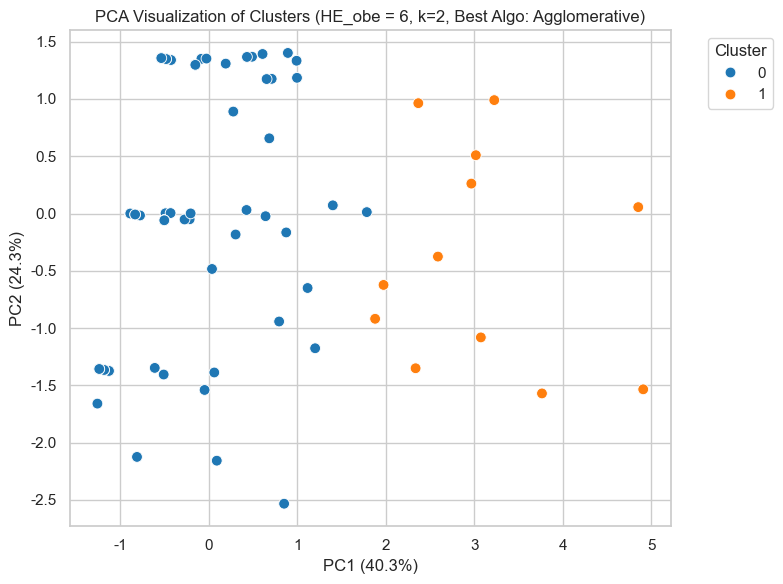


--- Processing complete ---


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # For silhouette plot colors
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MiniBatchKMeans # AgglomerativeClustering, DBSCAN, MiniBatchKMeans 임포트 추가
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# RandomForestClassifier는 이 특정 스니펫에서 직접 사용되지 않으므로 주석 처리하거나 필요에 따라 유지
# from sklearn.ensemble import RandomForestClassifier

# 통계 분석을 위한 라이브러리 임포트 (이 스니펫에서 직접 사용되지는 않음)
# from scipy import stats
# import statsmodels.api as sm
# from statsmodels.stats.contingency_tables import Table

# 시각화 설정
sns.set(style="whitegrid")

# 전처리 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def preprocess_data(df, original_numeric_cols, original_categorical_cols): ...

# select_features 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def select_features(df, columns, corr_threshold=0.8): ...

# compute_feature_importance 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def compute_feature_importance(df_processed, selected_cols, cluster_labels): ...

# visualize_silhouette 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def visualize_silhouette(cluster_lists, X_features): ...

# run_clustering_iteration 함수 (이 스니펫에서 정의되지 않았지만, 외부에서 정의되어 사용된다고 가정)
# def run_clustering_iteration(df_original, features_to_use, original_numeric_cols, original_categorical_cols, n_clusters, algorithm): ...


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
# 이 딕셔너리는 selected_cols에 있는 피처 이름에 대한 설명을 포함해야 합니다.
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량', # 이 피처가 selected_cols에 있는지 확인 필요
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도',
    # selected_cols에 포함된 다른 피처들도 여기에 추가해야 합니다.
    'age': '나이', 'sex': '성별', 'HE_HbA1c': '당화혈색소', # 예시 추가
    # ... selected_cols에 있는 모든 피처에 대한 매핑 추가 ...
}

# 시각화 설정
sns.set(style="whitegrid")

# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
# 예시 정의 (실제 코드에서는 이전에 정의된 변수를 사용해야 합니다)
# df_clustering = pd.read_csv("your_clustering_data.csv") # 실제 파일 경로
# selected_cols = ['HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu', 'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'BD1_11', 'tobacco', 'BE5_1', 'LS_VEG1', 'age', 'sex', 'HE_HbA1c'] # 실제 selected_cols 목록
# scaler = StandardScaler() # 스케일러 객체 (fit 되어 있어야 함)
# df_clustering['HE_obe'] 칼럼이 존재하고, 그 값이 [1, 2, 3, 4, 5, 6] 중에 있다고 가정합니다.


# 비교할 군집화 알고리즘 정의 (n_clusters를 사용하는 알고리즘)
# K-Means, Agglomerative, MiniBatchKMeans 포함
algorithms_to_compare = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'MiniBatchKMeans': MiniBatchKMeans,
    # DBSCAN은 n_clusters 기반 비교가 적합하지 않아 이 비교 루프에서는 제외합니다.
}


# HE_obe 별로 반복
# optimal_k 리스트는 각 HE_obe 값에 대해 미리 결정되어 있어야 합니다.
# 예: optimal_k_list = [4, 4, 5, 5, 5, 2]
# HE_obe_values = [1, 2, 3, 4, 5, 6] # 실제 HE_obe 고유값
# for HE_obe_value, optimal_k in zip(HE_obe_values, optimal_k_list):

for HE_obe_value, optimal_k in zip([1, 2, 3, 4, 5, 6], [4, 4, 5, 5, 5, 2]): # 제공해주신 예시 값 사용
    print(f"\n--- Processing HE_obe = {HE_obe_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함
    # df_clustering는 이전에 로드/처리되어 있어야 함
    HE_obe_df = df_clustering[df_clustering['HE_obe'] == HE_obe_value][selected_cols].copy()

    if not HE_obe_df.empty:
        # 표준화 (각 그룹별로 스케일링)
        # scaler는 이전에 fit 되어 있어야 하지만, 여기서는 각 그룹별로 fit_transform을 다시 수행합니다.
        # 만약 전체 데이터로 fit 했다면 여기서 transform만 사용해야 합니다.
        # 제공해주신 코드 형태대로 매 그룹별로 fit_transform 하는 경우를 따릅니다.
        scaled_df = scaler.fit_transform(HE_obe_df)

        # --- 다양한 군집화 알고리즘 비교 ---
        best_score = -1 # 가장 높은 실루엣 점수 추적
        best_labels = None # 가장 좋은 알고리즘의 클러스터 라벨 추적
        best_algo_name = None # 가장 좋은 알고리즘 이름 추적

        print(f"Comparing algorithms for k = {optimal_k}:")

        for algo_name, algo_class in algorithms_to_compare.items():
            try:
                # 클러스터 개수가 1개보다 많고, 데이터 포인트가 1개보다 많을 때만 유효한 비교
                if optimal_k > 1 and scaled_df.shape[0] > 1:
                    # 알고리즘 인스턴스 생성
                    if algo_name in ['KMeans', 'MiniBatchKMeans']: # KMeans 또는 MiniBatchKMeans
                        # n_init='auto' 또는 숫자로 지정 필요
                        model = algo_class(n_clusters=optimal_k, random_state=42, n_init='auto')
                    else: # Agglomerative Clustering
                        # Agglomerative Clustering은 n_init 매개변수 없음
                        model = algo_class(n_clusters=optimal_k)

                    # 클러스터링 수행
                    current_labels = model.fit_predict(scaled_df)

                    # 실루엣 점수 계산
                    # DBSCAN과 달리 이 알고리즘들은 모든 데이터에 라벨을 할당하므로 노이즈 제외 로직은 필요 없습니다.
                    current_score = silhouette_score(scaled_df, current_labels)
                    print(f"  - {algo_name}: Silhouette Score = {current_score:.4f}")

                    # 가장 높은 점수 업데이트
                    if current_score > best_score:
                        best_score = current_score
                        best_labels = current_labels # 현재 알고리즘의 라벨 저장
                        best_algo_name = algo_name # 현재 알고리즘 이름 저장

                else:
                    # 클러스터 개수가 1개 이하이거나 데이터 포인트가 부족하면 실루엣 점수 계산 불가
                    print(f"  - {algo_name}: Silhouette Score not computable (k<2 or insufficient data).")
                    # best_score는 여전히 -1 (초기값) 유지

            except Exception as e:
                print(f"  - {algo_name} failed: {e}")
                # 오류 발생 시 해당 알고리즘은 무시하고 계속 진행

        # --- 가장 높은 실루엣 점수를 가진 알고리즘의 결과 사용 ---
        if best_labels is not None:
            print(f"\nBest algorithm for HE_obe = {HE_obe_value} (k={optimal_k}): {best_algo_name} (Silhouette Score: {best_score:.4f})")
            final_cluster_labels = best_labels # 가장 좋은 라벨 사용
        else:
            print(f"\nCould not find a suitable clustering result for HE_obe = {HE_obe_value} (k={optimal_k}). Skipping analysis for this group.")
            continue # 이 그룹에 대한 분석 건너뛰기

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 최종 클러스터 라벨 추가
        # 인덱스가 맞아야 함
        HE_obe_df_with_labels = HE_obe_df.copy() # 원본 df 변경 방지를 위해 복사
        HE_obe_df_with_labels['New_Cluster'] = final_cluster_labels # 가장 좋은 라벨 사용

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = HE_obe_df_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_obe = {HE_obe_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 final_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = final_cluster_labels

        # PCA 2차원 축소
        # 스케일링된 데이터를 PCA에 사용
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df) # 스케일링된 데이터를 PCA에 사용

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 최종 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        # 제목에 HE_obe 값, k값, 사용된 알고리즘 이름 추가
        plt.title(f'PCA Visualization of Clusters (HE_obe = {HE_obe_value}, k={optimal_k}, Best Algo: {best_algo_name})')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    else:
        print(f"No data for HE_obe = {HE_obe_value}")
        print("-" * 60) # 구분선

print("\n--- Processing complete ---")
